In [80]:
# %load_ext nb_black
from IPython.display import display, HTML

display(HTML("<style>.container { width:85% !important; }</style>"))

## test spacy

In [79]:
try:
    import langdetect
    print("langdetect is installed")
except ImportError:
    print("langdetect is not installed")


In [74]:
try:
    import tarfile
    print("tarfile is installed")
except ImportError:
    print("tarfile is not installed")

tarfile is installed


In [109]:
import re
def clean_sentences(text):
    # Remove anything between {{ and }}
    cleaned = re.sub(r'\{\{.*?\}\}', '', text)
    return cleaned.strip()  # strip() to remove leading and trailing whitespaces


def find_sentences(body_text, target_text):
    sentences = split_sentences(body_text)
    
    for i, sentence in enumerate(sentences):
        if target_text in sentence:
            return clean_sentences(sentence)
    return None, None


In [111]:
import nltk

# If haven't downloaded the punkt package, should do it once
nltk.download('punkt')

'''
alternative way: same
'''
# def split_sentences(text):
#     sentence_detector = nltk.data.load('tokenizers/punkt/english.pickle')
#     sentences = sentence_detector.tokenize(text.strip())
#     return sentences

'''
alternative way: worse performance
'''
# def split_sentences(text):
#     nlp = spacy.load('en_core_web_sm')
#     # nlp = spacy.load('en_core_web_trf')
#     doc = nlp(text)
#     return [sent.text.strip() for sent in doc.sents]

def split_sentences(text):
    return nltk.tokenize.sent_tokenize(text)

[nltk_data] Downloading package punkt to /home/hongcc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [130]:
import tarfile

def read_file_from_large_tar(tar_filename, target_file):
    with tarfile.open(tar_filename, 'r') as archive:
        for member in archive.getmembers():
            if member.name == target_file:
                with archive.extractfile(member) as file:
                    return file.read().decode('utf-8')
        print(f"{target_file} is not found in the tar archive.")
        return None
    
def get_first_file_from_tar(tar_filename):
    with tarfile.open(tar_filename, 'r') as archive:
        for member in archive:  # Iterating over the archive members
            if member.isfile():  # Ensuring it's a file and not a directory or other non-file entity
                print(member.name.endswith('.jsonl'))
                print(member.name)
                with archive.extractfile(member) as file:
#                     return file.read().decode('utf-8')
                    content = file.read().decode('utf-8')
                    for line in content.splitlines()[:1000]:
                        data = json.loads(line)
                
                        paper_id = data.get("paper_id")
                        url = f"https://api.semanticscholar.org/graph/v1/paper/ARXIV:{paper_id}"
                        paper = requests.get(url).json()
                        print(paper)
            
                    
                        # Now, you can process 'value' as required
#                         return data  # Example: simply print the value
#                         break
                break
                
                
        return None
    
    
tar_filename = '/shared/2/datasets/unarXive/unarXive-Mar-2023/unarXive_230324.tar'
target_file = '00/arXiv_src_0007_001.jsonl'
# content = read_file_from_large_tar(tar_filename, target_file)
data = get_first_file_from_tar(tar_filename)

# Now, `content` contains the file's content. You can process it as needed.
# For instance, if you want to print the first 1000 characters:
# if content:
#     print(content[:1000])
data

True
00/arXiv_src_0001_001.jsonl
{'paperId': 'd78e0ab1141ca5a4d1c717f2bc8b179d5a655f18', 'title': 'Quantum tunneling dynamics using hydrodynamic trajectories'}
{'paperId': 'cddd26a705fcaaaa6e88fd37e01e6c3d0e8239d4', 'title': 'Induced coherence with and without induced emission'}
{'paperId': 'a262fe4cd53aa1459530e6025be85cc26416aadb', 'title': 'Motional effects of trapped atomic or ionic qubits'}
{'paperId': '561fef9d9f2c0dbc2c03e4ab1af7401a3947476a', 'title': 'On local invariants of pure three-qubit states'}
{'paperId': '8bc67c89a71cbbd16ac7dfdf76773dcf31071bc2', 'title': 'Entangled Chains'}
{'paperId': '082f842990b7032fd626ed648d2f3276314c0b50', 'title': 'There is no spooky action-at-a-distance in quantum correlations: Resolution of the EPR nonlocality puzzle'}
{'paperId': '4b53396ecc0a67ee9371454fd3cc18ff13787b0f', 'title': 'Noether Theorem and the quantum mechanical operators'}
{'paperId': '33c963b0ef1655b6e2f4f605b9d32a559f080952', 'title': 'Note on separability of the Werner state

{'paperId': 'bccd8b2d1dd8e5f4bc94b4278e13a253713b215c', 'title': 'Quantum diffusions and Appell systems'}
{'paperId': '5d48d5490344677af112a542b5086a3de19057df', 'title': 'Quantum authentication protocol'}
{'paperId': '07e00f20b8ae93ec16306262b396a6e884ba79ce', 'title': 'Quantum key distribution relied on trusted information center'}
{'paperId': 'e5f09a5a12cece1a4068c13bf808048fa642305b', 'title': 'Quantum key distribution based on Greenberger-Horne-Zeilinger state'}
{'paperId': '8dffbe374ee0d06cf0f5bce3a039d787037bf88f', 'title': 'Quantization of Soliton Cellular Automata'}
{'paperId': '276189f6e50caa590fc96f4189cc88af7f7c262e', 'title': 'IS SUPERSYMMETRIC QUANTUM MECHANICS COMPATIBLE WITH DUALITY'}
{'paperId': '4a014ab4c56f5bb8d73f63fd7a32b385bf9b75a0', 'title': 'First Single Bubble Sonoluminescence in Dubna'}
{'paperId': '9fce03563e95cacebc1af4f9fc865702b01c326d', 'title': 'Time dependence of evanescent quantum waves'}
{'paperId': 'f78cd921ad608e710985404445bcedd39e38b3f0', 'title':

{'paperId': '13732bed30d1bac0041ee2cb1d9b283d2dc7a825', 'title': 'Dream of a Christmas lecture'}
{'paperId': 'ed5bf4c1be6735ca303e453073e1c4247c7143a0', 'title': 'Decay channels and appearance sizes of doubly anionic gold and silver clusters'}
{'paperId': '2be76474ba8421b68b813018d1bcc3bcea5a9cb7', 'title': 'Application of Conditioning to the Gaussian-with-Boundary Problem in the Unified Approach to Confidence Intervals'}
{'paperId': '6772839ec0b14226108c335390bcb48195848eb6', 'title': 'Protein folding simulations in a deformed energy landscape'}
{'paperId': '267fa98e8326f2306e2ba43ed934249ca635a21a', 'title': 'Forecast and event control: On what is and what cannot be possible'}
{'paperId': 'e6256ca8c0a38e61f3f1329e15b126c8b7ee6e35', 'title': 'Scattering of positronium by H, He, Ne, and Ar'}
{'paperId': 'f50f109bf2804a3e74fb7385440bf7c22793ea2d', 'title': 'Measurement of mechanical vibrations excited in aluminium resonators by 0.6 GeV electrons'}
{'paperId': '965d549d56554110ac610565fd

{'paperId': '7beaa7dcfa5365105b34da15bd9c6fa2cfd2627b', 'title': 'Sensitivities of the proton-nucleus elastic scattering observables of {sup 6}He and {sup 8}He at intermediate energies'}
{'paperId': '2daf4a0fee8dd4ca37af7e6da02e3c6b5047697c', 'title': 'Production of \\phi Mesons in Near-Threshold \\pi N and N N Reactions'}
{'paperId': '596c8ea88a05ae8b8d66a23a71799bd3a4fc1674', 'title': 'The solar proton burning process revisited within a covariant model based on the Bethe-Salpeter formalism'}
{'paperId': 'fd3f51a63b6af62addf392c0335811164e2a85e5', 'title': 'Solutions of the pion dispersion equation in the medium: new aspects'}
{'paperId': 'f58cba68a22fef74b1ee8c1694c8c7a74b83f82b', 'title': 'Excitation functions of hadronic observablesfrom SIS to RHIC energies'}
{'paperId': '460d2bbf1132e46bef9556a926a0420d7d746156', 'title': 'Shell corrections for finite-depth deformed potentials: Green’s function oscillator expansion method'}
{'paperId': '1c96ce25b92f0290ee87379995f5d549fa0675d7', '

{'paperId': 'a903590734648a230f17c50f2491275a6389d422', 'title': 'Flow induced by a randomly vibrating boundary'}
{'paperId': '5b5d16c145e9f8b2eca037624e0dd4f1af009528', 'title': 'Period stabilization in the Busse–Heikes model of the Küppers–Lortz instability'}
{'paperId': '266d8e8ef10e2023c55ba662f2eb18981eada0e1', 'title': 'Soliton formation from a pulse passing the zero-dispersion point in a nonlinear Schrodinger equation'}
{'paperId': 'dfdc6ff3163c57a68807e05c2eda2750ef440fa0', 'title': 'Multi-component optical solitary waves'}
{'paperId': '40629b39364bca2a3cad1cdc327d0f08c3833a01', 'title': 'Truncation-type methods and Bäcklund transformations for ordinary differential equations: the third and fifth Painlevé equations'}
{'paperId': '17b0b6c75782aa9ca61cc4ecbd9fb2ff97ae10d1', 'title': 'Detection of Nonlinear Coupling and its Application to Cardiorespiratory Interaction'}
{'paperId': 'b86514fbdeb401509a7f1d02a06c3c592fca3f3f', 'title': 'Measuring information transfer'}
{'paperId': '

{'paperId': 'd97dbcb4414129a2dc4db23d336ec6d50ec5ad35', 'title': 'Graph-Laplacians and Dirac Operators on (Infinite) Graphs and the Calculation of the Connes-Distance-Functional'}
{'paperId': 'fa39f0e83fea47f4aa11fe4be36c2b455fb05348', 'title': 'Continuation of Direct Products of Distributions'}
{'paperId': 'a570477d3da308f348f526b3e33abe8a86ceddeb', 'title': 'The Boltzmann/Shannon entropy as a measure of correlation'}
{'paperId': 'd298785f77349e0e420e788e65742d1a00af72aa', 'title': 'A mixed mean-field/BCS phase with an energy gap at high $T_c$'}
{'paperId': 'f1f249624a616ec5a4aa629eb52bab49829073a1', 'title': 'Perturbed Pöschl–Teller oscillators'}
{'paperId': '618ad686119316ebd5d071aabbcb0dd711f9bfea', 'title': 'Transformations of ordinary differential equations via Darboux transformation technique'}
{'paperId': 'f65649d2e6f53fe7778978be59353e32aabda05c', 'title': 'On Representation of the P–Q Pair Solution at the Singular Point Neighborhood'}
{'paperId': 'd9af3109478a1f64b09603658d68

{'paperId': '2705e06994b08aee5c2dc195104bfc558e96bdf2', 'title': 'Homogeneous Hypersurfaces with Isotropy in Affine Four-space'}
{'paperId': 'e5ae871c0eb0eb995a8136196ec0f42990b7aa56', 'title': 'Fermionic Formulas for Level-Restricted Generalized Kostka Polynomials and Coset Branching Functions'}
{'paperId': '380f55cb95004dd213df4f2cceed2811b05d6677', 'title': 'A remark on the Chisini conjecture'}
{'paperId': 'c275536c35e7bdc254157bd96c4b1a7e8e501649', 'title': 'On infinite tensor products of projective unitary representations'}
{'paperId': '86d35b4a37046139078352f6b5b91d34578f4a15', 'title': 'Convex lattice polytopes and cones with few lattice points inside'}
{'paperId': '6d20a441db5a312e905c9361656343b21751de65', 'title': 'Manifolds with Boundary and of Bounded Geometry'}
{'paperId': 'e4a02065a0d139f16888f4bf6bea68a4f4c79c60', 'title': 'REFLEXIVE POLYHEDRA, WEIGHTS AND TORIC CALABI-YAU FIBRATIONS'}
{'paperId': '2161c06f42e7e0675978108bf273e2bfd21face0', 'title': 'Lefschetz numbers of

{'paperId': '6502663bdc7c2745243b5c75638698034adb31b3', 'title': 'Modular Symbols and Hecke Operators'}
{'paperId': '2035c25ac561163eb54e3cf4a15ac86bda793cc9', 'title': 'A GALOIS CORRESPONDENCE FOR II 1 FACTORS AND QUANTUM GROUPOIDS'}
{'paperId': 'a4353d1119bd6d98998b7712db3d6d43b78328d8', 'title': 'On [L]-homotopy groups'}
{'paperId': 'cf3c2c00fec322086beb654fbf5b348aa74dd073', 'title': "Path-wise solutions of SDE's driven by Levy processes"}
{'paperId': '354cbdb5988b8e9ade28643d1447132910fb66a0', 'title': 'Topological AE(0)-Groups'}
{'paperId': '50bbdbfad07c8ced82698633d692484b5d134132', 'title': 'Diffeomorphic flows driven by Levy processes'}
{'paperId': '8859bddd866bc3599ed7dd103141a1c36dbed932', 'title': 'The Gervais-Neveu-Felder equation for the Jordanian quasi-Hopf Uh;y(sl(2)) algebra'}
{'paperId': '7b6b15e249711142d4817b69b97a75c28c82d1db', 'title': 'An Adelic Causality Problem Related to Abelian L-Functions'}
{'paperId': '0ffb1969427db3df731b89de72dcb5f80a3f7223', 'title': 'Co

{'paperId': '3071a81d0c24aa2377f7ce242ebdc392b8c7d532', 'title': 'Zero modes of the Dirac operator in three-dimensions'}
{'paperId': 'd78332ce1d7cb09b4a5d783a12d39e8b8b02e2ca', 'title': 'Hopf instantons and the Liouville equation in target space'}
{'paperId': '03a098e2f7b1682b3caf1113ba88cb621cd34439', 'title': 'Decompactification of space or time in large N QCD2'}
{'paperId': '6ceea064c60eccc5ec206345e285b89ef7f13748', 'title': 'Space-time uncertainty relation and Lorentz invariance'}
{'paperId': '6fec989df764d9ad79dc32c8af97e3411abd6749', 'title': 'The four-fermi coupling of the supersymmetric non-linear sigma-model on G/S\\otimesU(1)^k'}
{'paperId': '063306182824ef78ae40bc2856a4ffebdd85f692', 'title': 'Anti-de Sitter vacua of gauged supergravities with 8 supercharges'}
{'paperId': '832a7b9d24cdf109427405c443868ef6e4854b51', 'title': 'Finite group modular data'}
{'paperId': '653817140fd983d76c57b9873a304f9eb527498d', 'title': 'Some reflections on moduli, their stabilization and cosmo

{'paperId': 'caab3ef1d3e692ada7ccb502e15d6b60ce85c6c5', 'title': 'Scales of string theory'}
{'paperId': '29e7821a8adcbee5f0a8c28e03c11ee1bfcf216e', 'title': 'Gravity in the brane-world for two-branes model with stabilized modulus'}
{'paperId': 'cf3dd765a58c0bda7b68aa7f90d55211cf0755cd', 'title': 'DUAL GENERALIZATIONS OF SINE–GORDON FIELD THEORY AND INTEGRABILITY SUBMANIFOLDS IN PARAMETER SPACE'}
{'paperId': '5a30b12281a1ee12cd38dab85acc1d7b968cd483', 'title': 'Quantum extreme black holes at finite temperature and exactly solvable models of 2d dilaton gravity'}
{'paperId': '0a740e4dfb7a57e4438b3c51696d8f44d78195a6', 'title': 'NONCOMMUTATIVE SUPER YANG-MILLS THEORIES WITH 8 SUPERCHARGES AND BRANE CONFIGURATIONS'}
{'paperId': 'c2a52f8fac3ac0d1111d5fb034eff8ab59d1e33c', 'title': 'Mesoscopic fluctuations in stochastic spacetime'}
{'paperId': '5cc5cdc523a0560aec32e7f93a8176a931ec3219', 'title': 'Trans-Planckian Redshifts and the Substance of the Space-Time River'}
{'paperId': 'e59bc87293537d

{'paperId': 'ad6dd3c813691ca1136a48bc366a8e25e3598220', 'title': 'A Comment on the holographic renormalization group and the soft dilaton theorem'}
{'paperId': 'b9d4a2cab223f30eafee478403c1350aa52358a6', 'title': 'Canonical Quantization and Topological Theories'}
{'paperId': 'c7eacc171d683a141af6bb1f270582202ec2ecec', 'title': 'Gauge Theories in Local Causal Perturbation Theory'}
{'paperId': '6f758fc1482172719508e1c798d6e1d2dd5e2c3c', 'title': 'Gravity and the Newtonian limit in the Randall-Sundrum model'}
{'paperId': '69066e168ef18d47e16fc01c898409f95b2b80b5', 'title': 'Boundary Liouville Field Theory I. Boundary State and Boundary Two-point Function'}
{'paperId': 'f165b6f800dff623909c59976bec397ccf72c81f', 'title': 'Noncommutativities of D-branes and /θ-changing degrees of freedom in D-brane matrix models'}
{'paperId': '8192ad03d4a3294a5f81f539be127373ec824cee', 'title': 'Instantons, Euclidean supersymmetry and Wick rotations'}
{'paperId': '142aff506a4c308f7191e3d4d2f85a7e89c0c797', 

{'paperId': '7a14dd4eb413176b6cdf50386d1161e47bc6d2f1', 'title': 'Possible cosmological implications of the quark-hadron phase transition'}
{'paperId': 'eb8f45de164a14e00f9f83a75d4112a4b919b209', 'title': 'Standard Model: An Introduction ∗'}
{'paperId': 'f64110c76136c1dfa2319c3ca7f1a41ea851ae6c', 'title': 'Quantum electrodynamics of composite fermions'}
{'paperId': '5294c34c53d5d9351289129277bef5e4627b032a', 'title': 'Effective field theory and chi p t'}
{'paperId': '5604278460a1fb515d8a825ccbccc0ad9284b285', 'title': 'Preasymptotic effects in b-decays'}
{'paperId': '323c90956d79d9f103b972adef4ade860c106a16', 'title': 'DIRAC Experiment and Test of Low-Energy QCD'}
{'paperId': '1d31ab3c44731cbf82ef3261b3c61995150ce121', 'title': 'Production of the bound triplet μ + μ - system in collisions of electrons with atoms'}
{'paperId': 'd2beffd65c1d0aaabae817c68b815f7deb73da93', 'title': 'The two-body electromagnetic pulsar'}
{'paperId': 'b153b0f52a46293cd66f7afca4c277970a0b5c44', 'title': 'On T

{'paperId': 'e84533ca0b55c4e81ca90607538cc32fc8335a64', 'title': 'A D-moduli problem?'}
{'paperId': '97ec3afc85f183f82195d4bf9629b0bbe6ed6d55', 'title': 'On the structure of large N(c) cancellations in baryon chiral perturbation theory'}
{'paperId': '58548bf192e9d396fbace3bc95d674846fb3c4e4', 'title': 'Relativistic Charge Form Factor of the Deuteron from (np)-Scattering Phase Shifts'}
{'paperId': 'f7e02ca788a7fe26300f40ac08f19ffb05779288', 'title': 'Sphaleron rate in the symmetric electroweak phase'}
{'paperId': '17cd9d65ecb4c0ed2c361a7da96291a47cf723ae', 'title': 'Zindication from new APV data in Cesium and searches at linear colliders'}
{'paperId': '97e8cb1c55d10a91a7f05a62bdc1c76a1c505cb2', 'title': 'How could the proton transversity be measured'}
{'paperId': '56feab00a1402bea3121a1ff9b059787d0d020a5', 'title': 'Trends in Grand Unification: unification at strong coupling and composite models'}
{'paperId': '3233139c9a2384ca544e879c2fcca325a98681ee', 'title': 'Single- W production and

{'paperId': '1d54d76d4605df58ba97a92d0fd370686d6d4d05', 'title': 'Parameterization of the polarized parton distribution functions'}
{'paperId': '019708ca0bba492e3a2dd4b490469b23e3c69a91', 'title': 'Instability of Classic Rotational Motion for Three-String Baryon Model'}
{'paperId': '5b34ecd1b6eee72770bfdaf8af784e7c9bfe2e2e', 'title': 'Exotic Quarkonia from Lattice QCD'}
{'paperId': 'a6b9e8034dd5bd0929a361593845494e6be82970', 'title': 'Strategy for discovering a low-mass Higgs boson at the Fermilab Tevatron'}
{'paperId': 'dbfdf78be8219014521ed4f973b52ef6521f5cbc', 'title': 'Azimuthal angle distribution in B ---> K* (---> K pi) lepton+ lepton- at low invariant m(lepton+ lepton-) region'}
{'paperId': 'e225d6e35e78d0cd6845f064a1c1bd62f928f8f5', 'title': 'Chiral expansion at energy scale of rho mass'}
{'paperId': '0d830cfe40f4e751dc3c6c515c2c2a1bc7926f86', 'title': 'Of Dips, Structures and Eikonalization'}
{'paperId': 'b93b546996e7fc9d6bfcd1eb6278c7f7501e382e', 'title': 'Event-by-Event Anal

{'paperId': 'bca18c88d641da8d48846b7689c0596cf97621be', 'title': 'Diffraction: a new approach'}
{'paperId': '6f6581dac8c8ce194e813a3a4d48cd0356c7f0d9', 'title': 'Breakdown of the KLN theorem for charged particles in condensed matter'}
{'paperId': '41ca10c601e46b082929edcaaeb6a7b1f45195dd', 'title': 'Thermal abundances of heavy particles'}
{'paperId': 'a0f2b34a0045c432785ff6cf0a204f156382b2c1', 'title': 'Thermal Field Theory in Equilibrium'}
{'paperId': 'bc90a40e7db37ad7ea9a33fa2248d4553dd1991d', 'title': "epsilon'/epsilon in the 1/N_c Expansion"}
{'paperId': '6880faa0813949f61d73f0704d527e1d774f137f', 'title': 'Electroweak Phase Transition in the MSSM: 4-Dimensional Lattice Simulations'}
{'paperId': '749b3b8506c5411fa095a1c4e2dd8dbf1bd825b2', 'title': 'ISAJET 7.37: A Monte Carlo Event Generator for $pp$, $\\bar pp$, and $e^+e^-$ Interactions'}
{'paperId': '2b617841278f2d1faf01633301d02852998f0423', 'title': 'The deconfinement phase transition, hadronization and the NJL model'}
{'paperI

{'paperId': '09f8c1371ef12b3ffede549a8ecba8afd089061e', 'title': 'Neutrino masses and Grand Unification'}
{'paperId': 'da75752a87eec13c7bd8cd5fd5faafced929a1a3', 'title': 'A four-neutrino texture implying bimaximal flavor mixing and reduced LSND effect'}
{'paperId': 'ba6e827033d03c1f044f32d45e605673640cd026', 'title': 'Estimate of a chiral-odd contribution to single transverse-spin asymmetry in hadronic pion production'}
{'paperId': '86306b158f4702825ad10b67286e4d5f9e021082', 'title': 'LETTER TO THE EDITOR: The xi(2230) meson and the pomeron trajectory'}
{'paperId': 'b52cad17f9c4f79d68a57602bfa55f4a7e760e43', 'title': 'Neutralino Proton Cross Sections In Supergravity Models'}
{'paperId': '610a7de0ed13b6bdd599fc468611a49d20b223c7', 'title': 'Muon collider physics at very high energies'}
{'paperId': '65143feb1d8f9e8ebc456b97f5542e9de6cd6074', 'title': 'Radion Potential and Brane Dynamics'}
{'paperId': 'c768abcd03df99b434a869d5346312a5e61466a4', 'title': 'Rapidity gaps at HERA and the Tev

In [122]:
# def process_json_line(data):
paper_id = data.get("paper_id")

metadata = data.get("metadata")
authors = metadata["authors"]
versions_first = metadata["versions"][0]["created"]
versions_last = metadata["versions"][-1]["created"]
authors = metadata["authors"]

discipline = data.get("discipline")

bib_entries = data.get("bib_entries")

number_of_reference = len(bib_entries)

cite_openalex_id_dict = {}
for key, value in bib_entries.items():
    cite_id = key
    openalex_id = value["ids"]["open_alex_id"]
    if not openalex_id == "":
        cite_openalex_id_dict[cite_id] = openalex_id.split("/")[-1]


body_text = data.get("body_text")
abstract = data.get("abstract")
body_text.append(abstract)

for section in body_text:
    if "cite_spans" in section:
        cite_spans = section["cite_spans"]
        section_text = section["text"]
        
        print(section_text)
        
        if not len(cite_spans) == 0:
            for cite_span in cite_spans:
                cite_text = cite_span["text"][7:-2]
                if cite_text in cite_openalex_id_dict:
                    output_id = cite_openalex_id_dict[cite_text]
                    output_context = find_sentences(section_text, cite_text)
                    
                    print(f"{output_id} : {output_context}")
                    print("--------------------------------\n")
                

Trajectory based constructions of quantum behavior are ubiquitous
throughout quantum physics. In the semi-classical limit, quantum
dynamics is approximated by classical equations of motion whereby the
transition amplitudes and wavefunctions are computed using the
classical action connecting the initial and final states.
Hydrodynamic constructions date back to early work by de
Broglie{{cite:1f978c6a27ad03c6511ecfee979ef62492c715ca}}, {{cite:9c858b9e1a2514d1751f87fb5bc9f3d23b2f23a2}}, {{cite:935594e2e79b45bf6838a956193445f31b9c2aaa}}, {{cite:dac4b12486361316a2542392f8eba33eae7905b4}}, {{cite:cae1ad51208830089cd1dba8bba6aa3188f2134b}}and Madelung 
later by Bohm. {{cite:54aefec3163dec13b0a9a56a3899aa827b8640d9}}, {{cite:58539e1f2dd4aa64fefe81045e1afaf1199d07c7}} The so called quantum trajectories
arising from this formalism have been the subject of a large number of
ontological and philosophical papers seeking a causal interpretation
of quantum mechanics. While a comprehensive overview of 

In [557]:
paper_id

In [106]:
full_text

In [558]:
url = f"https://api.semanticscholar.org/graph/v1/paper/search/ARXIV:{paper_id}"
# url = f"https://api.semanticscholar.org/graph/v1/paper/search/corpusId:212407874"
requests.get(url).json()

{'error': 'Paper with id search/ARXIV:2106.15928 not found'}

In [559]:
import requests
import json

arxiv_id = '2106.15928'
# Define the API endpoint and parameters
url = "https://api.semanticscholar.org/graph/v1/paper/search"
params = {
#     'query': "Quantum tunneling dynamics using hydrodynamic trajectories",
    'ARXIV': arxiv_id, 
    'limit': 10,  # Limit the number of results returned
#     'fields': "externalIds"
}

# Make the GET request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Print the results
    for paper in data['data']:
#         print(json.dumps(paper, indent=4))
        if "ArXiv" in paper['externalIds']:
            print(paper['externalIds']["ArXiv"])
else:
    print(f"Error: {response.status_code} - {response.text}")
    
# data


Error: 400 - {"error":"Missing required parameter: 'query'"}



In [81]:
try:
    import seaborn as sns
    print("seaborn is installed")
except ImportError:
    print("seaborn is not installed")


seaborn is installed


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_visual = None
df_visual = pd.read_csv("/shared/3/projects/citation-context/s2orc/df_visual_09_27.tsv", sep = "\t")
df_visual.shape

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


(3019380, 29)

In [527]:
df_visual.keys()

Index(['Unnamed: 0', 'citationcount_from_cited', 'citationcount_from_citing',
       'ims', 'year_from_citing', 'year_from_cited', 'publication_interval',
       'fieldsofstudy_s2_from_cited', 'fieldsofstudy_s2_from_cited_one',
       'fieldsofstudy_s2_from_citing', 'fieldsofstudy_s2_from_citing_one',
       'is_selfcited', 'context_length', 'team_size', 'context_count',
       'papercount_first_from_citing', 'citationcount_first_from_citing',
       'hindex_first_from_citing', 'papercount_last_from_citing',
       'citationcount_last_from_citing', 'hindex_last_from_citing',
       'isopenaccess_from_citing', 'referencecount_from_citing',
       'publicationtypes_from_citing', 'isopenaccess_from_cited',
       'referencecount_from_cited', 'publicationtypes_from_cited'],
      dtype='object')

In [391]:
df_visual["fieldsofstudy_s2_from_citing_one"].value_counts()[:5]

fieldsofstudy_s2_from_citing_one
Biology             1266089
Medicine             539631
Physics              290327
Computer Science     276359
Psychology           129839
Name: count, dtype: int64

In [451]:
df_visual['publicationtypes_from_cited'].value_counts()

publicationtypes_from_cited
['JournalArticle']                                            1408843
['Review', 'JournalArticle']                                   268598
['JournalArticle', 'Review']                                   136699
['Review']                                                      69305
['JournalArticle', 'Study']                                     58440
                                                               ...   
['MetaAnalysis', 'JournalArticle', 'CaseReport', 'Review']          1
['LettersAndComments', 'News', 'Review']                            1
['ClinicalTrial', 'CaseReport']                                     1
['LettersAndComments', 'ClinicalTrial', 'Review']                   1
['Study', 'JournalArticle', 'CaseReport', 'Review']                 1
Name: count, Length: 132, dtype: int64

In [467]:
df_visual.iloc[1]['publicationtypes_from_cited']

"['JournalArticle']"

In [541]:
def find_type(x):
    if x == "['JournalArticle']":
        return 'Journal'
    if x == "['Review']" or x == "['Review', 'JournalArticle']" or x == "['JournalArticle', 'Review']":
        return 'Review'
    if x == "['Conference']" or x == "['JournalArticle', 'Conference']" or x == "['JournalArticle', 'Book', 'Conference']":
        return 'Conference'
    else:
        return 'Other'

df_visual['publicationtypes_from_citing_category'] = df_visual['publicationtypes_from_citing'].apply(find_type)
df_visual['publicationtypes_from_cited_category'] = df_visual['publicationtypes_from_cited'].apply(find_type)

In [484]:
df_visual['publicationtypes_from_citing'].value_counts()[:20]

publicationtypes_from_citing
['JournalArticle']                              654425
['Review', 'JournalArticle']                    237411
['Review']                                       83591
['JournalArticle', 'Review']                     65669
['JournalArticle', 'Conference']                 19788
['JournalArticle', 'Study']                      19396
['Study', 'JournalArticle']                       5866
['Editorial']                                     2715
['JournalArticle', 'CaseReport']                  2666
['CaseReport']                                    2628
['JournalArticle', 'ClinicalTrial']               2528
['Review', 'MetaAnalysis', 'JournalArticle']      2174
['LettersAndComments']                            1700
['LettersAndComments', 'JournalArticle']          1576
['MetaAnalysis', 'JournalArticle']                1351
['Conference']                                    1042
['JournalArticle', 'Study', 'Review']             1023
['JournalArticle', 'Book', 'Conferen

No handles with labels found to put in legend.


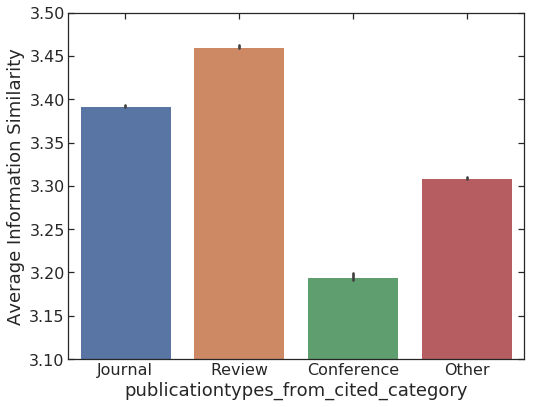

In [489]:

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x="publicationtypes_from_cited_category",y="ims",
            order=["Journal", "Review", "Conference", "Other", ],
             data = df_visual)

ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))

ax.set_ylim([3.1,3.5])

plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


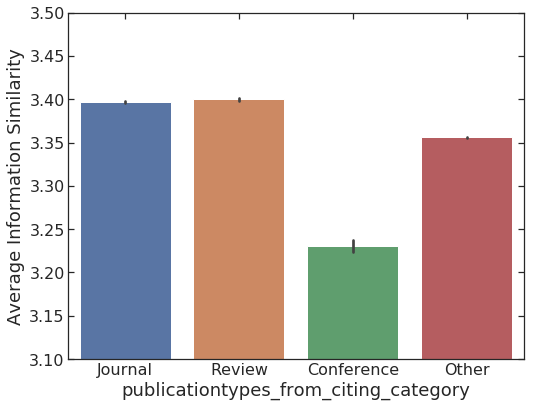

In [490]:

fig, ax = plt.subplots(figsize=(8,6))

sns.barplot(x="publicationtypes_from_citing_category",y="ims",
            order=["Journal", "Review", "Conference", "Other", ],
             data = df_visual)

ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
ax.set_ylim([3.1,3.5])
plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


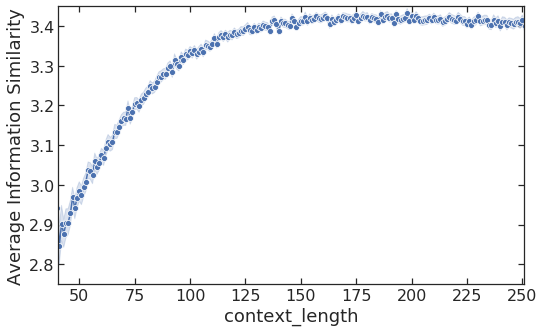

In [560]:
fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x="context_length",y="ims",
             data = df_visual,
             marker="o")

ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
ax.set_xlim([40.5,250.5])
ax.set_ylim([2.75,3.45])
plt.tight_layout()
plt.show()


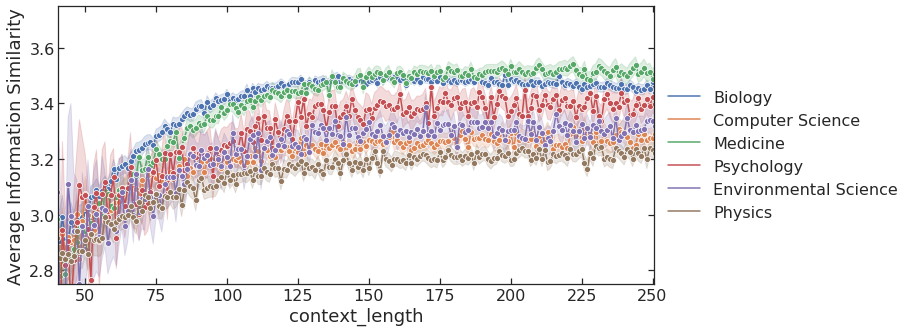

In [561]:

fig, ax = plt.subplots(figsize=(13,5))

sns.lineplot(x="context_length",y="ims",hue="fieldsofstudy_s2_from_citing_one",
             data = df_filtered,
             marker="o")

ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
ax.set_xlim([40.5,250.5])
ax.set_ylim([2.75,3.75])
plt.tight_layout()
plt.show()

In [537]:
df_visual['isopenaccess_from_cited'].value_counts()

isopenaccess_from_cited
True     2438274
False     581106
Name: count, dtype: int64

No handles with labels found to put in legend.


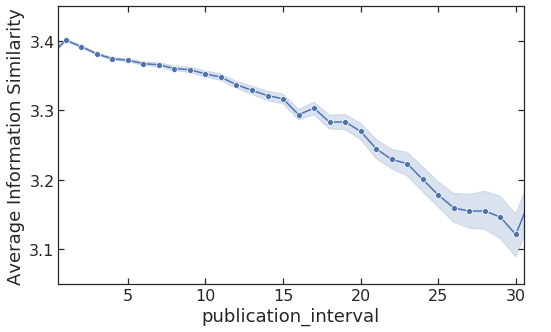

In [528]:

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x="publication_interval",y="ims",
             data = df_visual,
             marker="o")

ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
ax.set_xlim([0.5,30.5])
ax.set_ylim([3.05,3.45])
plt.tight_layout()
plt.show()



NameError: name 'linregress' is not defined

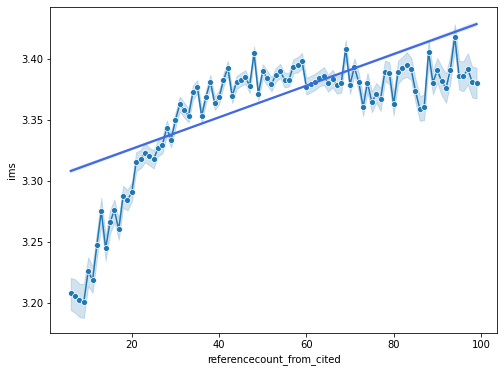

In [13]:
from scipy.stats import pearsonr

fig, ax = plt.subplots(figsize=(8,6))

# Filtered data for better visualization
filtered_data = df_visual[(df_visual.referencecount_from_cited < 100) & 
                          (df_visual.referencecount_from_cited > 5)]

# Plotting the lineplot
sns.lineplot(x="referencecount_from_cited", y="ims", data=filtered_data, marker="o")

# Fitting a regression line
sns.regplot(x="referencecount_from_cited", y="ims", data=filtered_data, scatter=False, ax=ax, color='royalblue')

# Calculate the regression line's slope and intercept
slope, intercept, r_value, p_value, std_err = linregress(filtered_data["referencecount_from_cited"], filtered_data["ims"])
# Calculate R squared from r_value
r_squared = r_value**2

ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.set_xlabel("Citation of the cited paper", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True, top=True, left=True, right=True, direction="in", labelsize=16)

# Placing the text with R squared and significance level
slope_text = f'Slope = {slope:.2f}, $R^2 = {r_squared:.2f}$'

# ax.text(0.05, 0.95, f'$R^2 = {r_squared:.2f}$', transform=ax.transAxes, fontsize=16, verticalalignment='top')
ax.text(0.05, 0.95, slope_text, transform=ax.transAxes, fontsize=16, verticalalignment='top')

plt.tight_layout()
plt.show()


In [5]:
r_squared

0.0019527574434088529

No handles with labels found to put in legend.


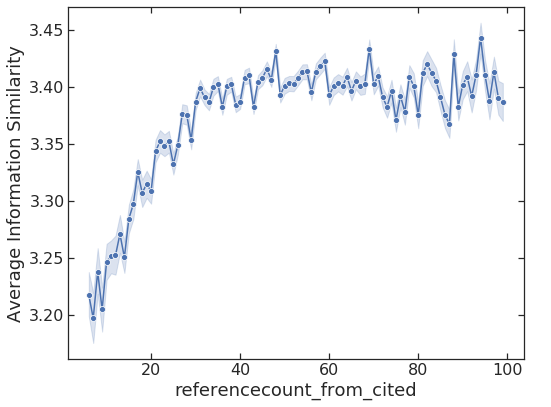

In [480]:

fig, ax = plt.subplots(figsize=(8,6))

sns.lineplot(x="referencecount_from_cited",y="ims",
             data = df_visual[(df_visual.referencecount_from_cited<100)&(df_visual.referencecount_from_cited>5)],
             marker="o")

ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))

plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


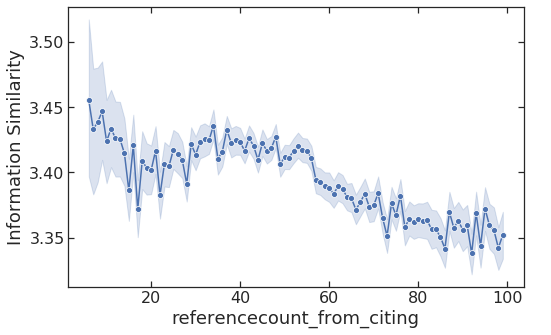

In [525]:

fig, ax = plt.subplots(figsize=(8,5))

sns.lineplot(x="referencecount_from_citing",y="ims",
             data = df_visual[(df_visual.referencecount_from_citing<100)&(df_visual.referencecount_from_citing>5)],
             marker="o")

ax.set_ylabel("Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))

plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


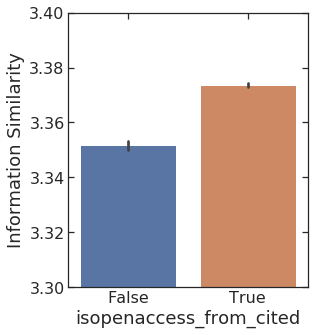

In [549]:

fig, ax = plt.subplots(figsize=(5, 5))

sns.barplot(x="isopenaccess_from_cited",y="ims",
             data = df_visual)

ax.set_ylabel("Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
ax.set_ylim([3.3,3.4])
plt.tight_layout()
plt.show()


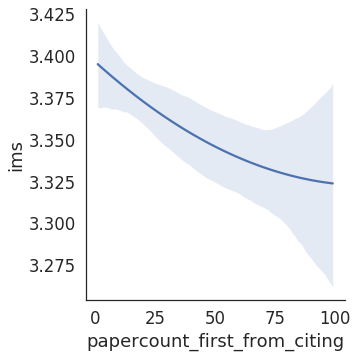

In [397]:
sns.lmplot(x="papercount_first_from_citing", y="ims", order=2, scatter=False,
           data=df_visual[df_visual.papercount_first_from_citing < 100].sample(10000))

No handles with labels found to put in legend.


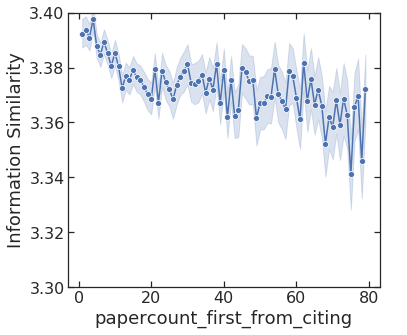

In [501]:
fig, ax = plt.subplots(figsize=(6, 5))

sns.lineplot(x="papercount_first_from_citing",y="ims",
             data = df_visual[df_visual.papercount_first_from_citing < 80],
             marker="o")
# ax.set_xlabel("Publication Year Interval", fontsize=18)
ax.set_ylabel("Information Similarity", fontsize=18)
# ax.set_xlim([1980,2020])
# ax.set_ylim([3.2, 3.45])
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
# ax.set_title("IMS of Citing Papers in Selected Fileds", fontsize=20)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
ax.set_ylim([3.3,3.4])

plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


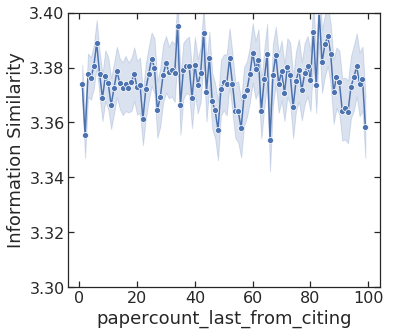

In [502]:
fig, ax = plt.subplots(figsize=(6,5))

sns.lineplot(x="papercount_last_from_citing",y="ims",
             data = df_visual[df_visual.papercount_last_from_citing < 100],
             marker="o")

ax.set_ylabel("Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
# ax.set_title("IMS of Citing Papers in Selected Fileds", fontsize=20)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
ax.set_ylim([3.3,3.4])

plt.tight_layout()
plt.show()

In [9]:
filtered_data_hindex = df_visual[df_visual.hindex_first_from_citing < 50]

corr_coeff, p = pearsonr(filtered_data_hindex["hindex_first_from_citing"], filtered_data_hindex["ims"])
r_squared = corr_coeff**2
p

6.270130514628991e-258

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


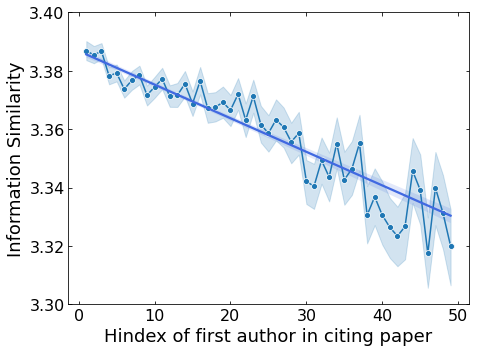

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


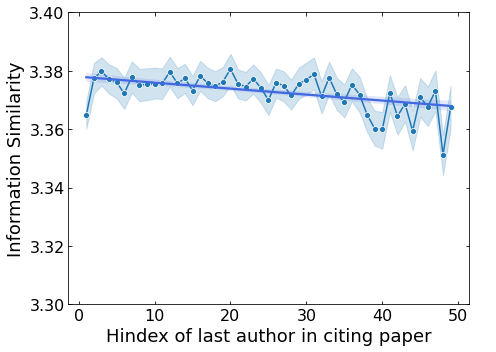

In [12]:
filtered_data_hindex = df_visual[df_visual.hindex_first_from_citing < 50]
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(x="hindex_first_from_citing",y="ims",data=filtered_data_hindex,marker="o")
sns.regplot(x="hindex_first_from_citing", y="ims",data=filtered_data_hindex,scatter=False,ax=ax,color='royalblue')
ax.set_ylabel("Information Similarity", fontsize=18)
ax.set_xlabel("Hindex of first author in citing paper", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True, direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
ax.set_ylim([3.3,3.4])
plt.tight_layout()
plt.show()


filtered_data_hindex = df_visual[df_visual.hindex_last_from_citing < 50]
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(x="hindex_last_from_citing",y="ims", data = filtered_data_hindex, marker="o")
sns.regplot(x="hindex_last_from_citing", y="ims",data=filtered_data_hindex, scatter=False, ax=ax,color='royalblue')
ax.set_xlabel("Hindex of last author in citing paper", fontsize=18)
ax.set_ylabel("Information Similarity", fontsize=18)
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True, direction="in",labelsize=16)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
ax.set_ylim([3.3,3.4])
plt.tight_layout()
plt.show()


In [289]:
df_visual['citation'] = ["citation > 500" if x > 500 else "citation <= 500" for x in df_visual['citationcount_from_cited']]

df_visual['year'] = ["year > 2010" if x > 2010 else "year <= 2010" for x in df_visual['year_from_cited']]

df_visual['combined'] = [f"{cite} & {year}" for cite, year in zip(df_visual['citation'], df_visual['year'])]




In [290]:
df_visual['combined'].value_counts()

combined
citation <= 500 & year > 2010     1092807
citation <= 500 & year <= 2010     530712
citation > 500 & year > 2010       131452
citation > 500 & year <= 2010      124720
Name: count, dtype: int64

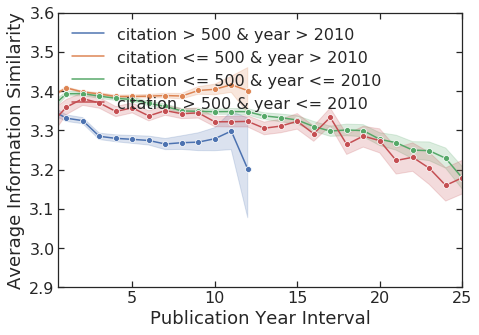

In [291]:
fig, ax = plt.subplots(figsize=(7, 5))

# Using error bars with a line plot
# sns.lineplot(x="publication_interval", y="ims",hue="fieldsofstudy_s2_from_citing_one", data=df_filtered, marker="o")
sns.lineplot(x="publication_interval", y="ims",
             hue="combined",
             data=df_visual, marker="o")
# 95% confidence interval

ax.set_xlabel("Publication Year Interval", fontsize=18)
ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.set_xlim([0.5,25])
ax.set_ylim([2.9, 3.6])

ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)

# ax.set_title("Average IMS per Year for Selected Fields", fontsize=20)
# ax.set_title("IMS of Citing Papers in Selected Fileds", fontsize=20)
ax.legend(loc='upper left',frameon=False,fontsize=16)

# plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# ax.set_xlim([-0.5,25.5])
# ax.set_ylim([2.85, 3.75])

# plt.title("Mean with Error Bars")
plt.tight_layout()
plt.show()



In [230]:
df_visual['citation'] = ["citation > 1000" if x > 1000 else "citation <= 1000" for x in df_visual['citationcount_from_cited']]


In [513]:
def f(x):
    if x <= 10:
        return 'citation<=10'
    if x <= 100:
        return 'citation<=100'
    if x >= 1000:
        return "citation>=1000"
    if x >= 500:
        return '500<=citation<1000'
    else:
        return None
df_visual['citation_category'] = df_visual.citationcount_from_cited.apply(f)

In [241]:
list(set(df_visual['citation_category']))

['x<=10', 'x>=1000', '500<=x<1000', 'x<=100', None]

In [293]:
df_visual.shape

(1879691, 16)

Text(0.5, 25.465625000000003, 'Average Information Similarity')

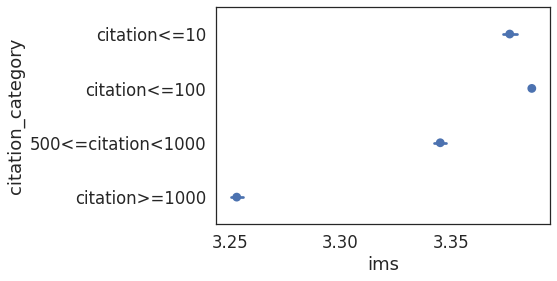

In [522]:
# sns.lineplot(x="publication_interval", y="ims",hue="fieldsofstudy_s2_from_citing_one", data=df_filtered, marker="o")
sns.pointplot(y="citation_category", x="ims", join=False,
              order=['citation<=10', 'citation<=100', '500<=citation<1000', 'citation>=1000', ],
             data=df_visual)

# ax.set_xlabel("Publication Year Interval", fontsize=18)
ax.set_xlabel("Average Information Similarity", fontsize=18)

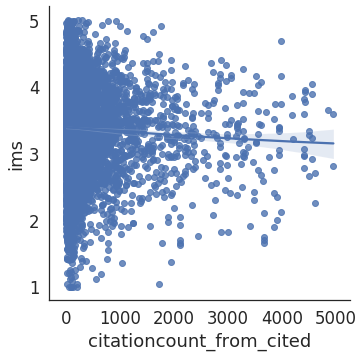

In [251]:
sns.lmplot(x="citationcount_from_cited", y="ims", order=2, #scatter=False,
           data=df_visual[df_visual.citationcount_from_cited < 5000].sample(10_000))

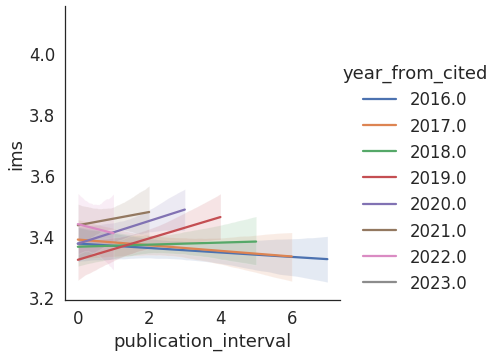

In [345]:
sns.lmplot(x="publication_interval", y="ims", scatter=False, order=1,
           hue="year_from_cited",
           data=df_visual[(df_visual.publication_interval >= 0) & (df_visual.year_from_cited > 2015) & (df_visual.citationcount_from_cited < 100)].sample(10_000))


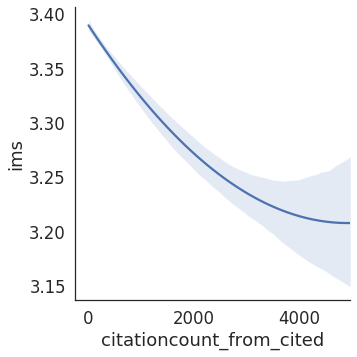

In [257]:
sns.lmplot(x="citationcount_from_cited", y="ims", order=2, scatter=False,
           data=df_visual[df_visual.citationcount_from_cited < 5000].sample(100_000))

In [ ]:
df_visual['period'] = 


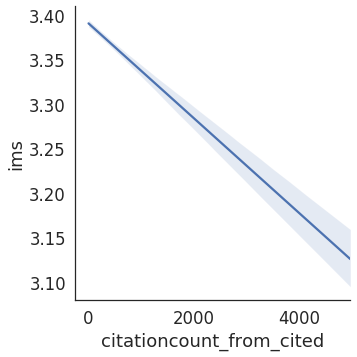

In [334]:
sns.lmplot(x="citationcount_from_cited", y="ims",
           order=1, scatter=False, 
           data=df_visual[df_visual.citationcount_from_cited < 5000].sample(100_000))

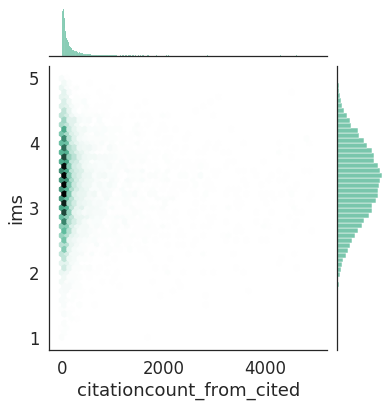

In [255]:
sns.jointplot(x="citationcount_from_cited", y="ims",
           data=df_visual[df_visual.citationcount_from_cited < 5000].sample(10_000),
              kind="hex", color="#4CB391")


In [ ]:
# selected_fields = set(['Biology', 'Medicine', 'Mathematics', 'Computer Science', 'Physics']) #'Psychology',

# df_filtered = df_citation.explode(['fieldsofstudy_s2_from_citing'])
# df_filtered = df_filtered.explode(['fieldsofstudy_s2_from_cited'])
# df_filtered = df_visual[df_visual['fieldsofstudy_s2_from_citing_one'].isin(selected_fields)]


In [421]:
df_visual['fieldsofstudy_s2_from_citing_one'].value_counts()[:17].index

Index(['Biology', 'Medicine', 'Physics', 'Computer Science', 'Psychology',
       'Environmental Science', 'Agricultural And Food Sciences',
       'Mathematics', 'Chemistry', 'Materials Science', 'Engineering',
       'Business', 'Economics', 'Education', 'Geology', 'Political Science',
       'Sociology'],
      dtype='object', name='fieldsofstudy_s2_from_citing_one')

In [547]:
selected_fields = set(['Biology', 'Medicine', 'Physics', 'Computer Science', 'Psychology',
       'Environmental Science', 'Agricultural And Food Sciences',
       'Mathematics', 'Chemistry', 'Materials Science', 'Engineering',
       'Business', 'Economics', 'Education', 'Geology', 'Political Science',
       'Sociology']) #'Psychology',

selected_fields = set(['Biology', 'Medicine', 'Physics', 'Computer Science', 'Psychology',
       'Environmental Science']) #'Psychology',

# Filter the dataframe
df_filtered = df_visual[df_visual['fieldsofstudy_s2_from_citing_one'].isin(selected_fields)]


In [296]:
df_filtered.keys()

Index(['Unnamed: 0', 'citationcount_from_cited', 'ims', 'year_from_citing',
       'year_from_cited', 'publication_interval',
       'fieldsofstudy_s2_from_cited_one', 'fieldsofstudy_s2_from_citing_one',
       'team_size', 'context_count', 'citation'],
      dtype='object')

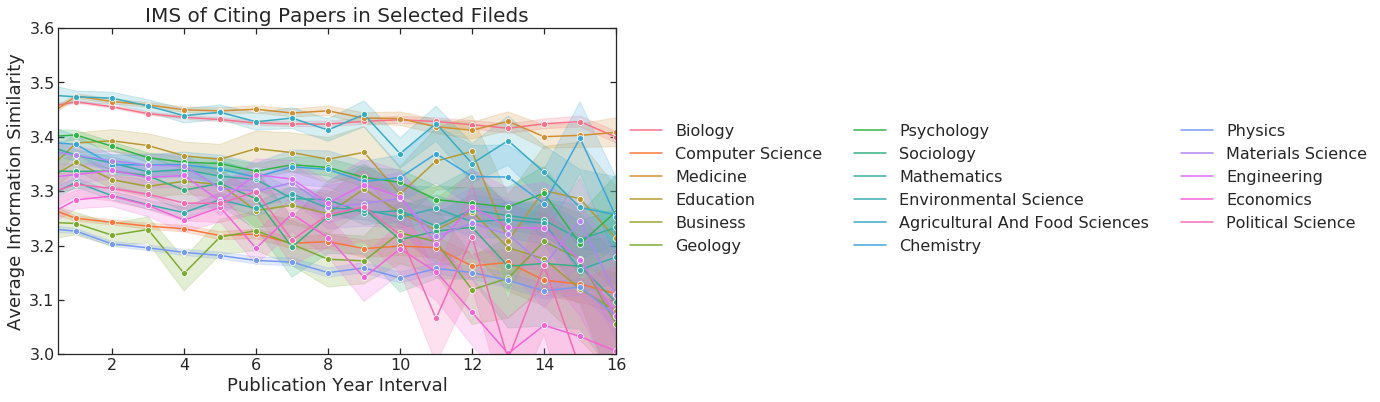

In [423]:
fig, ax = plt.subplots(figsize=(10, 6))

# Using error bars with a line plot
# sns.lineplot(x="publication_interval", y="ims",hue="fieldsofstudy_s2_from_citing_one", data=df_filtered, marker="o")
sns.lineplot(
#             x="year_from_citing",
            x="publication_interval",
             y="ims",
             hue="fieldsofstudy_s2_from_citing_one",
#              hue_order=['Biology', 'Medicine', 'Mathematics', 'Computer Science', 'Physics'],
             data=df_filtered,
#              data=df_visual,
                marker="o")
# 95% confidence interval

ax.set_xlabel("Publication Year Interval", fontsize=18)
ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.set_xlim([0.5,16])
# ax.set_xlim([1980,2020])
# ax.set_ylim([3.2, 3.45])
ax.set_ylim([3.0, 3.6])

ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)

# ax.set_title("Average IMS per Year for Selected Fields", fontsize=20)
ax.set_title("IMS of Citing Papers in Selected Fileds", fontsize=20)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75),ncol=3)

# plt.title("Mean with Error Bars")
# plt.tight_layout()
plt.show()



<ipython-input-495-350ced7e13df>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["period"] = df_filtered.publication_interval.apply(interval_period)


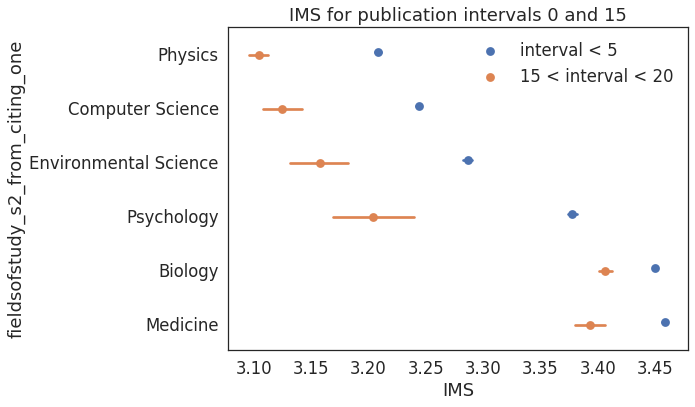

In [495]:
selected_fields = set(['Biology', 'Medicine', 'Physics', 'Computer Science', 'Psychology',
       'Environmental Science']) #'Psychology',

# Filter the dataframe
df_filtered = df_visual[df_visual['fieldsofstudy_s2_from_citing_one'].isin(selected_fields)]

def interval_period(x):
    if x < 5:
        return 0
    if x < 10:
        return 1
    if x < 15:
        return 2
    if x < 20:
        return 3
    else:
        return 4
    
df_filtered["period"] = df_filtered.publication_interval.apply(interval_period)

# Filter data for publication_interval=0
df_sort = df_filtered[df_filtered['period'] == 0]

# Get the sort order based on ims
sorted_fields = df_sort.groupby('fieldsofstudy_s2_from_citing_one')['ims'].mean().sort_values().index.tolist()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create a point plot using the sort order
sns.pointplot(y='fieldsofstudy_s2_from_citing_one',
              x='ims',
              hue='period', 
              data=df_filtered[df_filtered.period.isin([0,3])], 
#               data=df_filtered, 
              order=sorted_fields,  # Using the sort order
              join=False,  
#               markers=["o", "s"],  
              dodge=True,  
#               ci="sd",  
              ax=ax)

ax.set_title("IMS for publication intervals 0 and 15")
ax.set_xlabel("IMS")
# ax.legend(title='Publication Interval')

handles, labels = ax.get_legend_handles_labels()
new_labels = ['interval < 5', '15 < interval < 20']
ax.legend(handles, new_labels, title='',frameon=False)
plt.tight_layout()
plt.show()


### ?

No handles with labels found to put in legend.


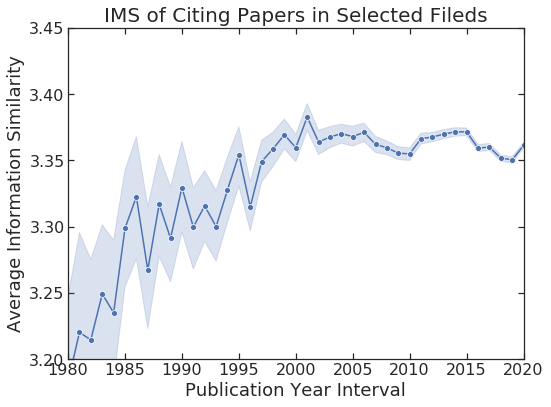

In [491]:
fig, ax = plt.subplots(figsize=(8, 6))

# Using error bars with a line plot
# sns.lineplot(x="publication_interval", y="ims",hue="fieldsofstudy_s2_from_citing_one", data=df_filtered, marker="o")
sns.lineplot(
            x="year_from_citing",
#             x="publication_interval",
             y="ims",
#              hue="fieldsofstudy_s2_from_citing_one",
#              hue_order=['Biology', 'Medicine', 'Mathematics', 'Computer Science', 'Physics'],
#              data=df_filtered,
             data=df_visual,
                marker="o")
# 95% confidence interval

ax.set_xlabel("Publication Year Interval", fontsize=18)
ax.set_ylabel("Average Information Similarity", fontsize=18)
# ax.set_xlim([0.5,16])
ax.set_xlim([1980,2020])
ax.set_ylim([3.2, 3.45])
# ax.set_ylim([3.0, 3.6])

ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)

# ax.set_title("Average IMS per Year for Selected Fields", fontsize=20)
ax.set_title("IMS of Citing Papers in Selected Fileds", fontsize=20)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))

# plt.title("Mean with Error Bars")
plt.tight_layout()
plt.show()



No handles with labels found to put in legend.


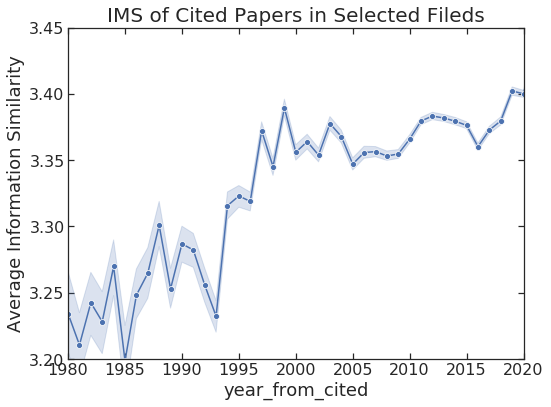

In [492]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x="year_from_cited",y="ims",data=df_visual,marker="o")
# ax.set_xlabel("Publication Year Interval", fontsize=18)
ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.set_xlim([1980,2020])
ax.set_ylim([3.2, 3.45])
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)
ax.set_title("IMS of Cited Papers in Selected Fileds", fontsize=20)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))

plt.tight_layout()
plt.show()


In [148]:
df_visual_2 = pd.read_csv("/shared/3/projects/citation-context/s2orc/df_visual_2.tsv", sep = "\t")
df_visual_2.shape


(41235, 3)

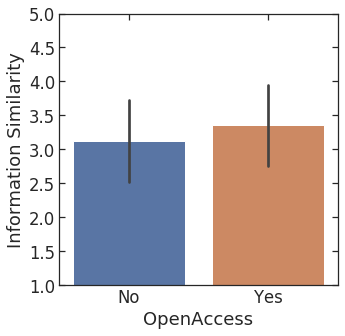

In [165]:

fig, ax = plt.subplots(figsize=(5, 5))
sns.set(font_scale=1.5)
sns.set_style("white")

sns.barplot(x='OpenAccess', y='ims', data=df_visual_2, ci='sd')  # ci='sd' shows the standard deviation as the error bar
# plt.title("Bar plot with confidence interval")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
ax.set_ylabel("Information Similarity")
ax.set_ylim([1,5])
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in")
plt.show()


In [ ]:
df_visual['cross_field'] = ["Within" if x == y else "Cross" for x, y in zip(df_visual['fieldsofstudy_s2_from_citing_one'], df_visual['fieldsofstudy_s2_from_cited_one'])]


In [261]:
df_visual['cross_field'].value_counts()

cross_field
Within    1398946
Cross      480745
Name: count, dtype: int64

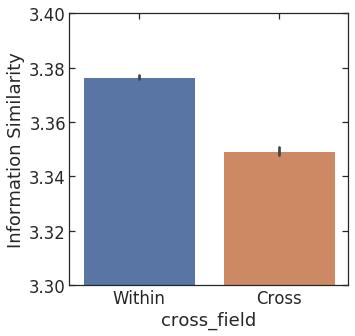

In [373]:
fig, ax = plt.subplots(figsize=(5, 5))
# sns.set(font_scale=1.5)
# sns.set_style("white")

sns.barplot(x='cross_field',
            y='ims',
            data=df_visual)  # ci='sd' shows the standard deviation as the error bar
# plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

ax.set_ylabel("Information Similarity")
ax.set_ylim([3.3,3.4])
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in")
plt.show()


In [374]:
df_visual["is_selfcited"].value_counts()

is_selfcited
True    2640051
Name: count, dtype: int64

In [ ]:
def is_selfcited(citing_authorId_list, cite_authorId_list):
    if citing_authorId_list is not None and not isNaN(citing_authorId_list):
        if cite_authorId_list is not None and not isNaN(cite_authorId_list):
            overlap = bool(set(citing_authorId_list) & set(cite_authorId_list))
            return overlap
    return False

def isNaN(num):
    return num != num


df_ims['authorId_list_from_citing'] = df_ims['authorId_list_from_citing'].progress_apply(ast.literal_eval)
df_ims['authorId_list_from_cited'] = df_ims['authorId_list_from_cited'].progress_apply(ast.literal_eval)

df_ims.loc[:, "is_selfcited"] = df_ims.progress_apply(
    lambda row: is_selfcited(
        row["authorId_list_from_citing"], row["authorId_list_from_cited"]
    ),
    axis=1,
)

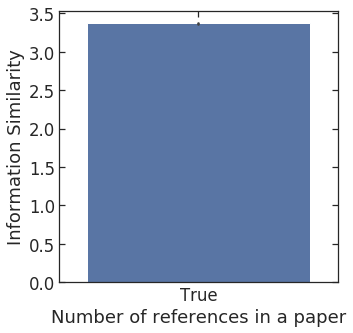

In [371]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.set(font_scale=1.5)
sns.set_style("white")

sns.barplot(x='is_selfcited', y='ims', data=df_visual)  # ci='sd' shows the standard deviation as the error bar
# plt.title("Bar plot with confidence interval")
# plt.xticks(ticks=[0, 1, 2], labels=['1', '2',  '>=3'])
ax.set_ylabel("Information Similarity")
ax.set_xlabel("Number of references in a paper")
# ax.set_ylim([3.3,3.6])
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in")
plt.show()


In [362]:
import ast

from tqdm import tqdm
tqdm.pandas()

df_visual['fieldsofstudy_s2_from_citing'] = df_visual['fieldsofstudy_s2_from_citing'].progress_apply(ast.literal_eval)
df_visual['number_field_from_citing'] = df_visual['fieldsofstudy_s2_from_citing'].apply(len)

df_visual['fieldsofstudy_s2_from_cited'] = df_visual['fieldsofstudy_s2_from_cited'].progress_apply(ast.literal_eval)
df_visual['number_field_from_cited'] = df_visual['fieldsofstudy_s2_from_cited'].apply(len)


100%|██████████| 3015706/3015706 [00:37<00:00, 80359.02it/s] 


In [365]:
df_visual['number_field_from_citing'] = [3 if x >= 3 else x for x in df_visual['number_field_from_citing']]

df_visual['number_field_from_cited'] = [3 if x >= 3 else x for x in df_visual['number_field_from_cited']]

In [363]:
df_visual['number_field_from_cited'].value_counts()

number_field_from_cited
1    2152056
2     806780
3      55460
4       1367
5         22
8         10
6          7
7          4
Name: count, dtype: int64

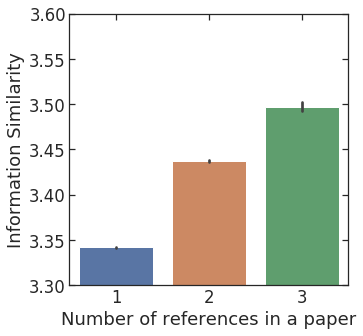

In [367]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.set(font_scale=1.5)
sns.set_style("white")

sns.barplot(x='number_field_from_citing', y='ims', data=df_visual)  # ci='sd' shows the standard deviation as the error bar
# plt.title("Bar plot with confidence interval")
# plt.xticks(ticks=[0, 1, 2], labels=['1', '2',  '>=3'])
ax.set_ylabel("Information Similarity")
ax.set_xlabel("Number of references in a paper")
ax.set_ylim([3.3,3.6])
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in")
plt.show()



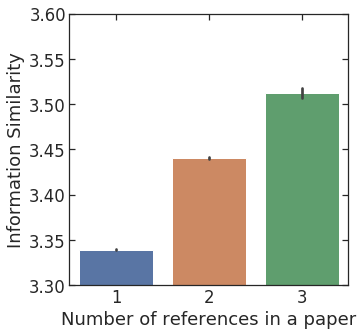

In [368]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.set(font_scale=1.5)
sns.set_style("white")

sns.barplot(x='number_field_from_cited', y='ims', data=df_visual)  # ci='sd' shows the standard deviation as the error bar
# plt.title("Bar plot with confidence interval")
# plt.xticks(ticks=[0, 1, 2], labels=['1', '2',  '>=3'])
ax.set_ylabel("Information Similarity")
ax.set_xlabel("Number of references in a paper")
ax.set_ylim([3.3,3.6])
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in")
plt.show()



In [197]:
df_visual['context'] = [3 if x >= 3 else x for x in df_visual['context_count']]

In [209]:
df_visual['context'].value_counts()

context
1.0    736864
3.0    735024
2.0    407803
Name: count, dtype: int64

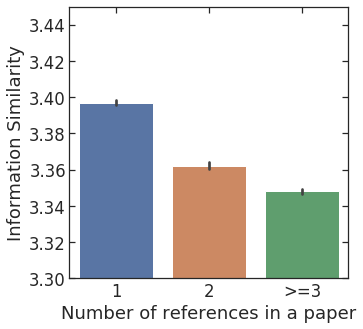

In [220]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.set(font_scale=1.5)
sns.set_style("white")

sns.barplot(x='context', y='ims', data=df_visual)  # ci='sd' shows the standard deviation as the error bar
# plt.title("Bar plot with confidence interval")
plt.xticks(ticks=[0, 1, 2], labels=['1', '2',  '>=3'])
ax.set_ylabel("Information Similarity")
ax.set_xlabel("Number of references in a paper")
ax.set_ylim([3.3,3.45])
ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in")
plt.show()



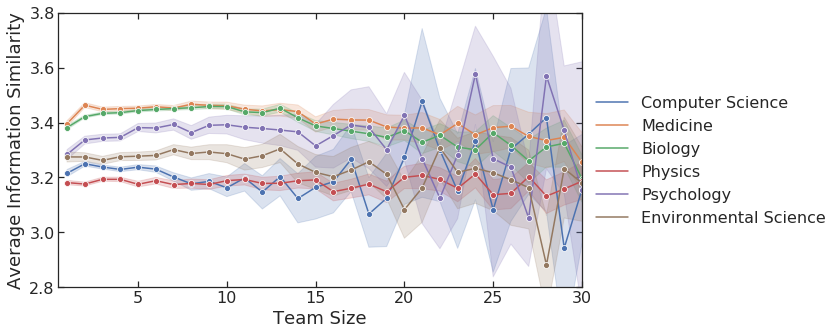

In [512]:
fig, ax = plt.subplots(figsize=(12,5))


# Using error bars with a line plot
sns.lineplot(x="team_size", y="ims",
             hue="fieldsofstudy_s2_from_citing_one",
#              data=df_visual, 
             data=df_filtered.sample(1_000_000), 
             marker="o")
# 95% confidence interval


ax.set_xlabel("Team Size", fontsize=18)
ax.set_ylabel("Average Information Similarity", fontsize=18)
ax.set_xlim([0.5,30])
ax.set_ylim([2.8, 3.8])


ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True,
               direction="in",labelsize=16)


# ax.set_title("Average IMS per Year for Selected Fields", fontsize=20)
# ax.set_title("IMS of Citing Papers in Selected Fileds", fontsize=20)
ax.legend(loc='upper left',frameon=False,fontsize=16, bbox_to_anchor=(1,0.75))
# plt.legend().remove()
# plt.title("Mean with Error Bars")
plt.tight_layout()
plt.show()



In [510]:
'''
physics? large team?
'''

'\nphysics? large team?\n'

In [53]:
from langdetect import detect
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

In [58]:
detect("War doesn't show who's right, just who's left.")

'en'

In [60]:
detect("War doesn't show who")

'en'

In [35]:
import nltk
nltk.download('punkt')

def split_sentences_nltk(text):
    text = text.replace("et al.", "et al ")
    return nltk.tokenize.sent_tokenize(text)


[nltk_data] Downloading package punkt to /home/hongcc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
split_sentences(text)

['This is a sentence.', 'This is another sentence!']

In [49]:
import spacy

# Set up GPU preference or requirement
# Use prefer_gpu() if you want to use GPU if available, but it's not mandatory.
# spacy.prefer_gpu()

# Load the spaCy model (in the same cell)
nlp = spacy.load("en_core_web_sm")  # Replace with your desired model name

# Your text and sentence splitting code
text = "This is a sentence. This is another sentence!"
doc = nlp(text)
sentences = list(doc.sents)

# Print the sentences
for i, sentence in enumerate(sentences):
    print(f"Sentence {i + 1}: {sentence.text}")

    
def split_sentences_spacy(text):
    text = text.replace("et al.", "et al ")
    return list(nlp(text).sents)
# P d be random.

Sentence 1: This is a sentence.
Sentence 2: This is another sentence!


In [40]:
content

'\nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\n\n\nAimee Maurais \nTerrence Alsup \nBenjamin Peherstorfer \nYoussef Marzouk \nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\ncovariance estimationmultifidelity methodsRiemannian geometrystatistical couplingestima- tion on manifoldsMahalanobis distance MSC codes 15B4815B5753Z5062J0265J1065J1565J20\nWe introduce a multifidelity estimator of covariance matrices formulated as the solution to a regression problem on the manifold of symmetric positive definite matrices. The estimator is positive definite by construction, and the Mahalanobis distance minimized to obtain it possesses properties which enable practical computation. We show that our manifold regression multifidelity (MRMF) covariance estimator is a maximum likelihood estimator under a certain error model on manifold tangent space. More broadly, we show tha

In [45]:
r1 = split_sentences_spacy(content)
r1

[
 Multifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *
 
 
 Aimee Maurais 
 Terrence Alsup ,
 Benjamin Peherstorfer 
 Youssef Marzouk 
 Multifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *
 covariance estimationmultifidelity methodsRiemannian geometrystatistical couplingestima- tion on manifoldsMahalanobis distance MSC codes 15B4815B5753Z5062J0265J1065J1565J20,
 We introduce a multifidelity estimator of covariance matrices formulated as the solution to a regression problem on the manifold of symmetric positive definite matrices.,
 The estimator is positive definite by construction, and the Mahalanobis distance minimized to obtain it possesses properties which enable practical computation.,
 We show that our manifold regression multifidelity (MRMF) covariance estimator is a maximum likelihood estimator under a certain error model on manifold tangent space.,
 More broadly, we 

In [42]:
r2 = split_sentences_nltk(content)
r2

['\nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\n\n\nAimee Maurais \nTerrence Alsup \nBenjamin Peherstorfer \nYoussef Marzouk \nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\ncovariance estimationmultifidelity methodsRiemannian geometrystatistical couplingestima- tion on manifoldsMahalanobis distance MSC codes 15B4815B5753Z5062J0265J1065J1565J20\nWe introduce a multifidelity estimator of covariance matrices formulated as the solution to a regression problem on the manifold of symmetric positive definite matrices.',
 'The estimator is positive definite by construction, and the Mahalanobis distance minimized to obtain it possesses properties which enable practical computation.',
 'We show that our manifold regression multifidelity (MRMF) covariance estimator is a maximum likelihood estimator under a certain error model on manifold tangent space.',
 'More broadly

In [15]:
import pandas as pd
import json

In [38]:
filename = '/shared/3/projects/citation-context/s2orc/s2orc/s2orc_0'
output_data = []

lines_to_read = 1  # Set the number of lines to read

# Open the file in read mode
with open(filename, 'r') as file_in_process:
    for i in range(lines_to_read):
        line = file_in_process.readline().strip()  # Read and strip newline characters
        if not line:
            break  # Break the loop if there are no more lines
        try:
            data = json.loads(line)
            corpusid = data.get("corpusid")
            content = data.get("content")["text"]

            # Check if none of the values are None
            if all([corpusid, content]):
                formatted_data = {
                    "corpusid": corpusid,
                    "content": content
                }
                output_data.append(formatted_data)

        except json.JSONDecodeError:
            print(f"Error decoding JSON for line: {line} \n")
            continue

print("\n")
            
# Print the processed data (first 10 lines)
for data in output_data:
    print(data)

# df = pd.DataFrame(output_data)



{'corpusid': 260125657, 'content': '\nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\n\n\nAimee Maurais \nTerrence Alsup \nBenjamin Peherstorfer \nYoussef Marzouk \nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\ncovariance estimationmultifidelity methodsRiemannian geometrystatistical couplingestima- tion on manifoldsMahalanobis distance MSC codes 15B4815B5753Z5062J0265J1065J1565J20\nWe introduce a multifidelity estimator of covariance matrices formulated as the solution to a regression problem on the manifold of symmetric positive definite matrices. The estimator is positive definite by construction, and the Mahalanobis distance minimized to obtain it possesses properties which enable practical computation. We show that our manifold regression multifidelity (MRMF) covariance estimator is a maximum likelihood estimator under a certain error model on manifold tan

In [15]:
!ls /shared/3/projects/citation-context/s2orc/

authors    combined_citations  combined_s2orc  s2orc
citations  combined_papers     papers


In [16]:
!rm /shared/3/projects/citation-context/s2orc/combined_papers

In [63]:
import os
import json
import pandas as pd


In [5]:
import os
import json
import pandas as pd

def read_and_process_data(filename):
    with open(filename, "r") as file:
        for line in file:
            yield json.loads(line)

def read_dataset_to_dataframe(dataset_name, n=30):
    data_frames = []  # List to store DataFrames from each file

    for index in range(n):
        filename = os.path.join("/shared/3/projects/citation-context/s2orc", dataset_name, dataset_name + "_" + str(index))
        data_generator = read_and_process_data(filename)
        df = pd.DataFrame(data_generator)

        ## if any filter needed

        data_frames.append(df)

    combined_df = pd.concat(data_frames, ignore_index=True)
    return combined_df


<IPython.core.display.Javascript object>

In [24]:
# df = read_dataset_to_dataframe("citations", 1)
# df.head(3)

<IPython.core.display.Javascript object>

In [ ]:
data_frames = []  # List to store DataFrames from each file

for index in range(30):
    filename = os.path.join("/shared/3/projects/citation-context/s2orc",dataset_name,dataset_name+"_"+str(index))

    with open(filename, "r") as file:
        lines = file.readlines()
        lines_read = [json.loads(line) for line in lines]

    df = pd.DataFrame(lines_read)
    print(df.head())

## one single df for citation relationship

In [84]:
dataset_name = "citations"
index = 0
filename = os.path.join(
    "/shared/3/projects/citation-context/s2orc",
    dataset_name,
    dataset_name + "_" + str(index),
)

with open(filename, "r") as file:
    lines = [next(file) for _ in range(10)]
    lines_read = [json.loads(line) for line in lines]

df_citation = pd.DataFrame(lines_read)
df_citation.head()

,citingcorpusid,citedcorpusid,isinfluential,contexts,intents
0,400627,26030700.0,False,None,None
1,8052634,20115689.0,False,"[For example, an assessment conducted in low-i...",[[methodology]]
2,8052634,18723300.0,False,[The restaurant findings in this assessment we...,[[result]]
3,9582179,42650799.0,False,"[For example, it is naïve to assume everyone f...",[[background]]
4,4391553,12267236.0,False,None,None


<IPython.core.display.Javascript object>

In [85]:
print(pd.__version__)
# explode support for 1.3
# df_citation.explode(['contexts','intents']).reset_index(drop=True)
# df_citation.set_index(['citingcorpusid', 'citedcorpusid']).apply(pd.Series.explode).reset_index()

1.1.5


<IPython.core.display.Javascript object>

In [88]:
df_citation = df_citation.dropna(
    subset=["citingcorpusid", "citedcorpusid", "contexts", "intents"]
)
df_citation.loc[:, "context_count"] = df_citation["contexts"].apply(
    lambda x: len(x) if x is not None else 0
)

# df_citation.loc[:, 'if_background'] = df_citation['intents'].apply(lambda x: 'background' in x[0] if x is not None else False)
df_citation.loc[:, "if_background"] = df_citation["intents"].apply(
    lambda x: "background" in x[0] if x[0] is not None else False
)

# df_citation = df_citation.explode(['contexts'])
df_citation.loc[:, "context_combine"] = df_citation["contexts"].apply(
    lambda x: " ".join(x) if x is not None else 0
)

df_citation.loc[:, "citedcorpusid"] = df_citation["citedcorpusid"].astype(int)

df_citation

,citingcorpusid,citedcorpusid,isinfluential,contexts,intents,context_count,if_background,context_combine
1,8052634,20115689,False,"[For example, an assessment conducted in low-i...",[[methodology]],1,False,"For example, an assessment conducted in low-in..."
2,8052634,18723300,False,[The restaurant findings in this assessment we...,[[result]],1,False,The restaurant findings in this assessment wer...
3,9582179,42650799,False,"[For example, it is naïve to assume everyone f...",[[background]],1,True,"For example, it is naïve to assume everyone fr..."
5,9582179,60529348,False,[The purpose of positivistic activity is to\nr...,[[background]],1,True,The purpose of positivistic activity is to\nre...


<IPython.core.display.Javascript object>

In [89]:
df_citation["context_combine"].to_list()[0]

'For example, an assessment conducted in low-income urban neighborhoods of Philadelphia in 2011 (6) found that just over half of surveyed convenience stores sold whole grain bread (56%); similarly, low availability of whole grain breads was found in American Samoa (39%).'

<IPython.core.display.Javascript object>

In [90]:
# df_citation['intents'].to_list()

<IPython.core.display.Javascript object>

In [91]:
# df_citation['intents'].to_list()

<IPython.core.display.Javascript object>

In [92]:
print(df_citation.dtypes)

citingcorpusid      int64
citedcorpusid       int64
isinfluential        bool
contexts           object
intents            object
context_count       int64
if_background        bool
context_combine    object
dtype: object


<IPython.core.display.Javascript object>

In [93]:
df_citation[df_citation["citingcorpusid"] == 18723300]

,citingcorpusid,citedcorpusid,isinfluential,contexts,intents,context_count,if_background,context_combine


<IPython.core.display.Javascript object>

TypeError: set_xticks() got an unexpected keyword argument 'labels'

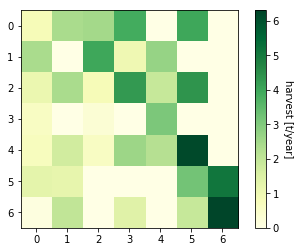

<IPython.core.display.Javascript object>

In [67]:
def heatmap(
    data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs
):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if ax is None:
        ax = plt.gca()

    if cbar_kw is None:
        cbar_kw = {}

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(
    im,
    data=None,
    valfmt="{x:.2f}",
    textcolors=("black", "white"),
    threshold=None,
    **textkw
):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts


fig, ax = plt.subplots()

im, cbar = heatmap(
    harvest, vegetables, farmers, ax=ax, cmap="YlGn", cbarlabel="harvest [t/year]"
)
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

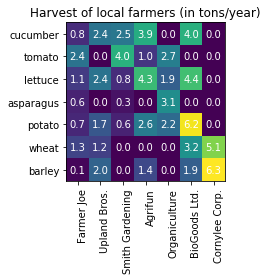

<IPython.core.display.Javascript object>

In [70]:
field_name_list = [
#                   "Biology", "Medicine", "Physics",
#                   "ComputerScience", "EnvironmentalScience", "Engineering",
#                   "MaterialsScience", "PoliticalScience", "Psychology",
#                   "Mathematics", "Sociology", "Chemistry",
                  "Philosophy", "Geology","Economics", "Geography",
                  "Business", "History", "Art"]

harvest = np.array(
    [
        [0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
        [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
        [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
        [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
        [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
        [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
        [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3],
    ]
)


fig, ax = plt.subplots()
im = ax.imshow(harvest)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))

ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)


# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j], ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [ ]:
field_name_list = [
                  "Biology", "Medicine", "Physics",
                  "ComputerScience", "EnvironmentalScience", "Engineering",
                  "MaterialsScience", "PoliticalScience", "Psychology",
                  "Mathematics", "Sociology", "Chemistry",
                  "Philosophy", "Geology","Economics", "Geography",
                  "Business", "History", "Art"]

import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = {"a_to_b": 10, "c_to_b": 10, "e_to_b": 10, "b_to_b": 10}  # Your dictionary

# Create an empty matrix
matrix = np.zeros((len(field_name_list), len(field_name_list)))

# Parse the dictionary into the matrix
for key, value in data.items():
    x_str, y_str = key.split("_to_")
    x_idx = values.index(x_str)
    y_idx = values.index(y_str)
    matrix[x_idx, y_idx] = value  # Assign the dictionary value to the matrix

# Plot the matrix
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(harvest)

# plt.matshow(matrix, cmap='viridis')
plt.colorbar()

ax.set_xticks(np.arange(len(field_name_list)))
ax.set_yticks(np.arange(len(field_name_list)))
ax.set_xticklabels(field_name_list)
ax.set_yticklabels(field_name_list)

plt.xlabel('To')
plt.ylabel('From')

plt.title('Matrix Visualization')
fig.tight_layout()
plt.show()


# df for paper information

In [74]:
unique_values = df["publicationtypes"].unique()
print(unique_values)

TypeError: unhashable type: 'list'

<IPython.core.display.Javascript object>

In [78]:
# df["publicationtypes"].value_counts()
df["fieldsofstudy_s2"].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Medicine]                          95
[Biology]                           59
[Physics]                           46
[Engineering]                       31
[Computer Science]                  28
                                    ..
[Economics, Computer Science]        1
[Environmental Science, Biology]     1
[Computer Science, Engineering]      1
[Psychology, Sociology]              1
[Psychology, Linguistics]            1
Name: fieldsofstudy_s2, Length: 68, dtype: int64

<IPython.core.display.Javascript object>

In [95]:
data = df_paper["fieldsofstudy_s2"].to_list()

from collections import Counter
from itertools import chain

# Flatten the list and remove None values
flattened = list(chain.from_iterable(filter(None, data)))

# Count occurrences
counter = Counter(flattened)
top_5 = counter.most_common(5)
print(top_5)

KeyError: 'fieldsofstudy_s2'

<IPython.core.display.Javascript object>

In [408]:
dataset_name = "papers"
index = 0
filename = os.path.join(
    "/shared/3/projects/citation-context/s2orc",
    dataset_name,
    dataset_name + "_" + str(index),
)
with open(filename, "r") as file:
    lines = [next(file) for _ in range(1_0_000)]
    lines_read = [json.loads(line) for line in lines]

df_paper = pd.DataFrame(lines_read)
df_paper.head()

,corpusid,externalids,url,title,authors,venue,publicationvenueid,year,referencecount,citationcount,influentialcitationcount,isopenaccess,s2fieldsofstudy,publicationtypes,publicationdate,journal
0,46851114,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/79f37a34...,Maximum likelihood estimation based regression...,"[{'authorId': '2110555168', 'name': 'Lu Guo'},...",Spectrochimica Acta Part A - Molecular and Bio...,5bc5dd42-09ab-4ce7-bf5b-8355ee95577c,2018.0,18,2,0,False,"[{'category': 'Mathematics', 'source': 's2-fos...",[JournalArticle],2018-01-15,"{'name': 'Spectrochimica acta. Part A, Molecul..."
1,37367809,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/da4cc181...,Strabismus surgery: specifics for success.,"[{'authorId': '145382267', 'name': 'R. Reineck...",American Orthoptic Journal,c161b526-dfdc-43aa-bc1b-6ac2c41d9cb6,1977.0,0,0,0,False,"[{'category': 'Medicine', 'source': 's2-fos-mo...",[JournalArticle],None,"{'name': 'The American orthoptic journal', 'pa..."
2,32904104,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/e34fa71c...,[Therapeutic indications in mammary cancers].,"[{'authorId': '5028180', 'name': 'H. Redon'}]",Annales de Chirurgie,981a0584-778b-4600-927a-a3bda74167db,1961.0,0,0,0,False,None,[JournalArticle],1961-04-01,"{'name': 'Annales de chirurgie', 'pages': ' ..."
3,37251459,"{'ACL': None, 'DBLP': 'journals/gis/Goh89', 'A...",https://www.semanticscholar.org/paper/149ace08...,A graphic query language for cartographic and ...,"[{'authorId': '46311398', 'name': 'P. Goh'}]",International Journal of Geographical Informat...,969f39c1-0d68-4ada-a88b-a685d4164873,1989.0,6,28,0,False,"[{'category': 'Computer Science', 'source': 's...",[JournalArticle],1989-07-01,"{'name': 'Int. J. Geogr. Inf. Sci.', 'pages': ..."
4,31035303,"{'ACL': None, 'DBLP': None, 'ArXiv': None, 'MA...",https://www.semanticscholar.org/paper/48830397...,(Ca + Mg)-stimulated ATPase activity of a rat ...,"[{'authorId': '152115472', 'name': 'J. Robinso...",Archives of Biochemistry and Biophysics,d1d486ec-2c87-4721-8bca-f399625d18e5,1976.0,27,61,1,False,"[{'category': 'Biology', 'source': 's2-fos-mod...",[JournalArticle],1976-09-01,{'name': 'Archives of biochemistry and biophys...


In [407]:
df_paper['publicationtypes'].value_counts()

publicationtypes
[JournalArticle]                               142600
[Review]                                        41849
[Review, JournalArticle]                        12919
[JournalArticle, Review]                        11257
[Conference]                                    10957
                                                ...  
[JournalArticle, MetaAnalysis]                      1
[LettersAndComments, Review, CaseReport]            1
[Review, Study, JournalArticle, CaseReport]         1
[Review, JournalArticle, Conference]                1
[News, JournalArticle, CaseReport]                  1
Name: count, Length: 159, dtype: int64

In [321]:
df_paper.iloc[5]['title']

'[Weight of the European wildcat (Felis silvestris Schreber 1777)].'

In [320]:
df_paper.iloc[5]['authors']

[{'authorId': '153148092', 'name': 'B. Condé'},
 {'authorId': '46840606', 'name': 'P. Schauenberg'}]

In [306]:
df_paper.iloc[0]['externalids']

{'ACL': None,
 'DBLP': None,
 'ArXiv': None,
 'MAG': '2747375629',
 'CorpusId': '46851114',
 'PubMed': '28826107',
 'DOI': '10.1016/j.saa.2017.08.020',
 'PubMedCentral': None}

In [73]:
df_paper["isopenaccess"].value_counts()

isopenaccess
False    88050
True     11950
Name: count, dtype: int64

In [65]:
df_paper.keys()

Index(['corpusid', 'externalids', 'url', 'title', 'authors', 'venue',
       'publicationvenueid', 'year', 'referencecount', 'citationcount',
       'influentialcitationcount', 'isopenaccess', 's2fieldsofstudy',
       'publicationtypes', 'publicationdate', 'journal'],
      dtype='object')

In [101]:
# GET "field of study"
df_paper.loc[:, 'fieldsofstudy_s2'] = df_paper['s2fieldsofstudy'].apply(lambda x: [y["category"] for y in x if y["source"]=="s2-fos-model"] if x is not None else x)
df_paper.loc[:, 'fieldsofstudy_ex'] = df_paper['s2fieldsofstudy'].apply(lambda x: [y["category"] for y in x if y["source"]=="external"] if x is not None else x)

# GET "author"
df_paper.loc[:, 'authorId_first'] = df_paper['authors'].apply(lambda x: x[0]["authorId"] if len(x)>0 else None)
df_paper.loc[:, 'authorId_last'] = df_paper['authors'].apply(lambda x: x[-1]["authorId"] if len(x)>0 else None)
df_paper.loc[:, 'authorId_list'] = df_paper['authors'].apply(lambda x: [y["authorId"] for y in x] if len(x)>0 else None)
df_paper.loc[:, 'num_author'] = df_paper['authors'].apply(lambda x: len(x))

# GET "IDs"
df_paper.loc[:, 'acl_id'] = df_paper['externalids'].apply(lambda x: x["ACL"])
df_paper.loc[:, 'mag_id'] = df_paper['externalids'].apply(lambda x: x["MAG"])
df_paper.loc[:, 'arxiv_id'] = df_paper['externalids'].apply(lambda x: x["ArXiv"])
df_paper.loc[:, 'doi'] = df_paper['externalids'].apply(lambda x: x["DOI"])

# Change data type
# df_paper.loc[:, "year"] = df_paper["year"].astype(int)
## we only need year difference



<IPython.core.display.Javascript object>

In [102]:
df_paper["year"].isnull().sum()

11

<IPython.core.display.Javascript object>

In [103]:
columns_to_drop = [
    "externalids",
    "url",
    "authors",
    "publicationvenueid",
    "s2fieldsofstudy",
    "publicationtypes",
    "publicationdate",
    "journal",
]

df_paper = df_paper.drop(columns=columns_to_drop)

df_paper.head(3)

,corpusid,title,venue,year,referencecount,citationcount,influentialcitationcount,isopenaccess,fieldsofstudy_s2,fieldsofstudy_ex,authorId_first,authorId_last,authorId_list,num_author,acl_id,mag_id,arxiv_id,doi
0,46851114,Maximum likelihood estimation based regression...,Spectrochimica Acta Part A - Molecular and Bio...,2018.0,18,2,0,False,[Mathematics],"[Chemistry, Medicine]",2110555168,48756525,"[2110555168, 2444202, 48756525]",3,None,2747375629,None,10.1016/j.saa.2017.08.020
1,37367809,Strabismus surgery: specifics for success.,American Orthoptic Journal,1977.0,0,0,0,False,[Medicine],[Medicine],145382267,145382267,[145382267],1,None,None,None,10.1080/0065955x.1977.11982440
2,32904104,[Therapeutic indications in mammary cancers].,Annales de Chirurgie,1961.0,0,0,0,False,None,None,5028180,5028180,[5028180],1,None,2433811468,None,None


<IPython.core.display.Javascript object>

In [108]:
df_paper_to_merge = df_paper[
    ["corpusid", "year", "citationcount", "fieldsofstudy_s2", "authorId_list"]
]
df_paper_to_merge.head(3)

,corpusid,year,citationcount,fieldsofstudy_s2,authorId_list
0,46851114,2018.0,2,[Mathematics],"[2110555168, 2444202, 48756525]"
1,37367809,1977.0,0,[Medicine],[145382267]
2,32904104,1961.0,0,None,[5028180]


<IPython.core.display.Javascript object>

# df for author information

In [383]:
dataset_name = "authors"
index = 0
filename = os.path.join(
    "/shared/3/projects/citation-context/s2orc",
    dataset_name,
    dataset_name + "_" + str(index),
)
with open(filename, "r") as file:
    lines = [next(file) for _ in range(100_000)]
    lines_read = [json.loads(line) for line in lines]

df_author = pd.DataFrame(lines_read)
df_author.head()

,authorid,externalids,url,name,aliases,affiliations,homepage,papercount,citationcount,hindex
0,39265526,None,https://www.semanticscholar.org/author/39265526,R. Fiedler,"[R Fiedler, R. Fiedler, Roman Fiedler]",None,None,55.0,775,16
1,40380629,"{'DBLP': ['Kathinka Dæhli Kurz'], 'ORCID': None}",https://www.semanticscholar.org/author/40380629,K. D. Kurz,"[Kathinka D. Kurz, K. D. Kurz, Kathinka Dæhli ...",None,None,24.0,239,9
2,145858447,None,https://www.semanticscholar.org/author/145858447,Frank Y. S. Chuang,"[Frank Chuang, Frank S Chuang, Frank Y S Chuang]",None,None,22.0,1305,10
3,2053111979,None,https://www.semanticscholar.org/author/2053111979,Qin Dong,None,None,None,2.0,0,0
4,10829729,"{'DBLP': ['Nao Kawai'], 'ORCID': None}",https://www.semanticscholar.org/author/10829729,Nao Kawai,None,None,None,2.0,3,1


In [385]:
df_author["affiliations"].isnull().sum()/100000

0.99651

In [130]:
cols_to_keep = ["papercount", "citationcount", "hindex"]
df_author[cols_to_keep] = df_author[
    ["papercount", "citationcount", "hindex"]
].add_prefix("author_")
df_author = df_author[["authorid"] + cols_to_keep]
df_author.head(3)

,authorid,papercount,citationcount,hindex
0,39265526,55,775,16
1,40380629,24,239,9
2,145858447,22,1305,10


<IPython.core.display.Javascript object>

In [105]:
df_author.loc[:, "paper_ciation_hindex"] = df_author.apply(
    lambda row: [row["papercount"], row["citationcount"], row["hindex"]], axis=1
)
df_author = df_author[["authorid", "paper_ciation_hindex"]]
df_author
# df["externalids"].to_list()[0]

,authorid,paper_ciation_hindex
0,39265526,"[55, 775, 16]"
1,40380629,"[24, 239, 9]"
2,145858447,"[22, 1305, 10]"
3,2053111979,"[2, 0, 0]"
4,10829729,"[2, 3, 1]"


<IPython.core.display.Javascript object>

# df for annotation information

In [271]:
dataset_name = "s2orc"
index = 0
filename = os.path.join(
    "/shared/3/projects/citation-context/s2orc",
    dataset_name,
    dataset_name + "_" + str(index),
)
with open(filename, "r") as file:
    lines = [next(file) for _ in range(5)]
    lines_read = [json.loads(line) for line in lines]

df_annotation = pd.DataFrame(lines_read)
df_annotation.head()

,corpusid,externalids,content
0,260125657,"{'arxiv': '2307.12438', 'mag': None, 'acl': No...",{'source': {'pdfurls': ['https://export.arxiv....
1,260109533,"{'arxiv': None, 'mag': None, 'acl': None, 'pub...","{'source': {'pdfurls': None, 'pdfsha': '8eaf84..."
2,260109702,"{'arxiv': None, 'mag': None, 'acl': None, 'pub...","{'source': {'pdfurls': None, 'pdfsha': '991e83..."
3,260139471,"{'arxiv': None, 'mag': None, 'acl': None, 'pub...","{'source': {'pdfurls': None, 'pdfsha': '457b33..."
4,258538282,"{'arxiv': None, 'mag': None, 'acl': None, 'pub...","{'source': {'pdfurls': None, 'pdfsha': '450d4d..."


In [273]:
df_annotation.iloc[0]["externalids"]

{'ACL': None,
 'DBLP': None,
 'ArXiv': None,
 'MAG': '2747375629',
 'CorpusId': '46851114',
 'PubMed': '28826107',
 'DOI': '10.1016/j.saa.2017.08.020',
 'PubMedCentral': None}

{'arxiv': '2307.12438',
 'mag': None,
 'acl': None,
 'pubmed': None,
 'pubmedcentral': None,
 'dblp': None,
 'doi': None}

In [277]:
df_annotation.iloc[0]["content"]

{'source': {'pdfurls': ['https://export.arxiv.org/pdf/2307.12438v1.pdf'],
  'pdfsha': '69da9ebeb5511d4ed0a4ec1a1ba7a23d22ab72c5',
  'oainfo': None},
 'text': '\nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\n\n\nAimee Maurais \nTerrence Alsup \nBenjamin Peherstorfer \nYoussef Marzouk \nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\ncovariance estimationmultifidelity methodsRiemannian geometrystatistical couplingestima- tion on manifoldsMahalanobis distance MSC codes 15B4815B5753Z5062J0265J1065J1565J20\nWe introduce a multifidelity estimator of covariance matrices formulated as the solution to a regression problem on the manifold of symmetric positive definite matrices. The estimator is positive definite by construction, and the Mahalanobis distance minimized to obtain it possesses properties which enable practical computation. We show that our manifold regressio

In [107]:
df_annotation.loc[:, "full_text"] = df_annotation["content"].apply(lambda x: x["text"])
df_annotation = df_annotation[["corpusid", "full_text"]]
df_annotation

,corpusid,full_text
0,260125657,\nMultifidelity Covariance Estimation via Regr...
1,260109533,\n\n\n\nA Wernich \nMit Berücksichtigung\nöffe...
2,260109702,\nAus der Pathologisch-anatomischen Anstalt de...
3,260139471,\nJournal of Patient-Reported Outcomes Identif...
4,258538282,\nSocio-Scientific Learning During the COVID-1...


<IPython.core.display.Javascript object>

In [ ]:
df_annotation.loc[:, 'IMS'] = df_annotation['full_text'].apply(lambda x: compute_IMS(x))

In [92]:
df["content"].to_list()[0]['text']
# [93479:93522]

'\nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\n\n\nAimee Maurais \nTerrence Alsup \nBenjamin Peherstorfer \nYoussef Marzouk \nMultifidelity Covariance Estimation via Regression on the Manifold of Symmetric Positive Definite Matrices *\ncovariance estimationmultifidelity methodsRiemannian geometrystatistical couplingestima- tion on manifoldsMahalanobis distance MSC codes 15B4815B5753Z5062J0265J1065J1565J20\nWe introduce a multifidelity estimator of covariance matrices formulated as the solution to a regression problem on the manifold of symmetric positive definite matrices. The estimator is positive definite by construction, and the Mahalanobis distance minimized to obtain it possesses properties which enable practical computation. We show that our manifold regression multifidelity (MRMF) covariance estimator is a maximum likelihood estimator under a certain error model on manifold tangent space. More broadly, we show tha

In [79]:
df["content"].to_list()[0]['text'][1580:1584]

'[32]'

In [84]:
n

'['

In [103]:
# for n in df["content"].to_list()[0]['annotations']["bibentry"]:
text = df["content"].to_list()[0]['text']
# Parse JSON string
data = json.loads(df["content"].to_list()[0]['annotations']["bibref"])
# Create a DataFrame from the parsed JSON data
df_0 = pd.DataFrame(data)
df_0["text"] = df_0.apply(lambda row: text[row['start']:row['end']], axis = 1)
print(df_0["text"].to_list())
(df_0)

['[32]', '[35]', '[13]', '[28]', '[17,', '29]', '[27]', '[48]', '[30]', '[32,', '31,', '16]', '[8,', '19]', '[20,', '5]', '[21,', '12,', '40,', '41,', '23]', '[43]', '[50,', '51]', '[21,', '12]', '[40,', '42]', '[50]', '[9]', '[39]', '[47]', '[26]', '[36]', '[3]', '[15]', '[14]', '[50]', '[6]', '[50]', '[36]', '[6]', '[44]', '[6]', '[44]', '[44,', '45]', '[50]', '(1)', '2', '[53]', '[11]', '[52]', '(3.5)', '[44]', '[36]', '[49]', '[29,', '18]', '[36]', '[36]', '[36]', '[3]', '(4.19)', '(3.5)', '[50,', '51]', '[34,', '7]', '[33]', '[1,', '10,', '54]', '[46,', '37]', '[6,', '206]', '[36]', '[58]', '[57,', '56,', '30,', '4]', '[58]', '[25]', '[36]', '[36]', '[36]', '[36]', '(4.16)', '[42]', '[58]', '[36]', '[36]', '[58]', '[36]', '[44]', '[38]', '[22]', '[2,', '55,', '24]', '(3.5)', '(4.20)', '[53]']


,attributes,end,start,text
0,{'ref_id': 'b31'},1584,1580,[32]
1,{'ref_id': 'b34'},1737,1733,[35]
2,{'ref_id': 'b12'},1765,1761,[13]
3,{'ref_id': 'b27'},1885,1881,[28]
4,{'ref_id': 'b16'},2009,2005,"[17,"
...,...,...,...,...
100,{'ref_id': 'b54'},60419,60416,"55,"
101,{'ref_id': 'b23'},60422,60419,24]
102,NaN,65164,65159,(3.5)
103,NaN,71932,71926,(4.20)


In [67]:
df["content"].to_list()[0]['annotations']

{'abstract': '[{"end":1547,"start":465}]',
 'author': '[{"end":126,"start":112},{"end":142,"start":127},{"end":165,"start":143},{"end":182,"start":166}]',
 'authoraffiliation': None,
 'authorfirstname': '[{"end":117,"start":112},{"end":135,"start":127},{"end":151,"start":143},{"end":173,"start":166}]',
 'authorlastname': '[{"end":125,"start":118},{"end":141,"start":136},{"end":164,"start":152},{"end":181,"start":174}]',
 'bibauthor': '[{"end":93536,"start":93524},{"end":93546,"start":93536},{"end":93559,"start":93546},{"end":93814,"start":93802},{"end":94035,"start":94024},{"end":94046,"start":94035},{"end":94056,"start":94046},{"end":94066,"start":94056},{"end":94462,"start":94452},{"end":94473,"start":94462},{"end":94483,"start":94473},{"end":94796,"start":94783},{"end":94805,"start":94796},{"end":95063,"start":95053},{"end":95215,"start":95205},{"end":95223,"start":95215},{"end":95230,"start":95223},{"end":95521,"start":95509},{"end":95531,"start":95521},{"end":95887,"start":95877},

In [66]:
df["content"].to_list()[0]['annotations'].keys()

dict_keys(['abstract', 'author', 'authoraffiliation', 'authorfirstname', 'authorlastname', 'bibauthor', 'bibauthorfirstname', 'bibauthorlastname', 'bibentry', 'bibref', 'bibtitle', 'bibvenue', 'figure', 'figurecaption', 'figureref', 'formula', 'paragraph', 'publisher', 'sectionheader', 'table', 'tableref', 'title', 'venue'])

In [94]:
df["content"].to_list()[0]['annotations']['abstract']

'['

for a agggregated dataframe, I need

citingcorpusid  citedcorpusid  isinfluential contexts intents 

In [ ]:
/Users/hakunamatata/Downloads/abstract_parser.zip

In [97]:
os.getcwd()

'/home/hongcc'

In [ ]:
from sci_parser import SciParser
sciparser = SciParser(cuda = True)
preds, raw_scores = sciparser.predict(input_text)

In [ ]:
https://drive.google.com/file/d/1aJvS3aDb0CIBYJXC0G38MtezYxREUqdK/view


# merge into df_citation

In [110]:
df_citation.head(1)

,citingcorpusid,citedcorpusid,isinfluential,contexts,intents,context_count,if_background,context_combine
1,8052634,20115689,False,"[For example, an assessment conducted in low-i...",[[methodology]],1,False,"For example, an assessment conducted in low-in..."


<IPython.core.display.Javascript object>

In [109]:
df_paper_to_merge.head(1)

,corpusid,year,citationcount,fieldsofstudy_s2,authorId_list
0,46851114,2018.0,2,[Mathematics],"[2110555168, 2444202, 48756525]"


<IPython.core.display.Javascript object>

In [116]:
df_merge = df_citation.copy()
# First merge on 'citingcorpusid' and 'id'
df_merge = df_merge.merge(
    df_paper_to_merge.add_suffix("_from_citing"),
    left_on="citingcorpusid",
    right_on="corpusid_from_citing",
    #     suffixes=("", "_from_citing"),
)

# Second merge on 'citedcorpusid' and 'id'
df_merge = df_merge.merge(
    df_paper_to_merge.add_suffix("_from_cited"),
    left_on="citedcorpusid",
    right_on="corpusid_from_cited",
    #     suffixes=("", "_from_cited"),
)

df_merge

,citingcorpusid,citedcorpusid,isinfluential,contexts,intents,context_count,if_background,context_combine,corpusid_from_citing,year_from_citing,citationcount_from_citing,fieldsofstudy_s2_from_citing,authorId_list_from_citing,corpusid_from_cited,year_from_cited,citationcount_from_cited,fieldsofstudy_s2_from_cited,authorId_list_from_cited


<IPython.core.display.Javascript object>

# merging

In [4]:
import json
import os
import pandas as pd
from tqdm import tqdm

In [389]:
filename = '/shared/3/projects/citation-context/s2orc/combined_authors'

data = []
with open(filename, "r") as file:
    for i, line in enumerate(tqdm(file, desc="Processing lines")):
        if i >= 3:
            break
        data.append(json.loads(line))

df_first_ten = pd.DataFrame(data)
print(df_first_ten.shape)
df_first_ten.head(3)

Processing lines: 3it [00:00, 14961.85it/s]

(3, 4)


,authorid,papercount,citationcount,hindex
0,2097086415,2,1,1
1,80864271,5,3,1
2,2103217169,2,1,1


In [67]:
filename = '/shared/3/projects/citation-context/s2orc/combined_papers'
print(os.path.getsize(filename)/1024/1024/1024)

with open(filename, "r") as file:
    lines = file.readlines()
    data = [json.loads(line) for line in tqdm(lines, desc="Processing lines")]
#     data = [json.loads(line) for line in tqdm(file, desc="Processing lines")]

df_papers = pd.DataFrame(data)
print(df_papers.shape)
df_papers.head(3)

11.663066264241934


Processing lines: 100%|██████████| 77375525/77375525 [26:29<00:00, 48683.85it/s]  


(77375525, 5)


,corpusid,year,citationcount,fieldsofstudy_s2,authorId_list
0,94893668,1980,2,[Chemistry],"[3858999, 12850762]"
1,73923683,2009,6,[Medicine],"[87305685, 87725700, 14252408, 7825187]"
2,59930362,2010,2,[Mathematics],[40496783]


In [5]:
filename = '/shared/3/projects/citation-context/s2orc/combined_citations'
print(f"File size: {os.path.getsize(filename)/1024/1024/1024:.2f} GB")

with open(filename, "r") as file:
    lines = file.readlines()
    data = [json.loads(line) for line in tqdm(lines, desc="Processing lines")]

df_citations = pd.DataFrame(data)
print(df_citations.shape)
df_citations.head(3)

File size: 16.08 GB


Processing lines: 100%|██████████| 50531717/50531717 [12:43<00:00, 66213.54it/s]  


(50531717, 5)


,citingcorpusid,citedcorpusid,context,context_count,intent
0,39317800,2199895,Previous work pointed out that C4 new process ...,1,[background]
1,8216946,270718,methods and 1/f noise and WGN is considered i...,1,[methodology]
2,21868864,7111273,Previous literature investigates the role of w...,2,[background]


In [12]:
filename = '/shared/3/projects/citation-context/s2orc/combined_s2orc'
print(f"File size: {os.path.getsize(filename)/1024/1024/1024:.2f} GB")

with open(filename, "r") as file:
    lines = file.readlines()
    data = [json.loads(line) for line in tqdm(lines, desc="Processing lines")]

df_texts = pd.DataFrame(data)
print(df_texts.shape)
df_texts.head(3)

File size: 15.97 GB


Processing lines: 100%|██████████| 356333/356333 [02:18<00:00, 2579.39it/s]


(356333, 2)


,corpusid,full_text
0,259935884,\nThe Journal of Clinical Investigation Preser...
1,259935896,\nKetosis Prevents Abdominal Aortic Aneurysm R...
2,259936911,\nSKEW DERIVATIONS OF INCIDENCE ALGEBRAS\n17 J...


In [72]:
set([2,3])

TypeError: 'set' object does not support indexing

In [73]:
corpusid_set = set(df_citations["citingcorpusid"].to_list() + df_citations["citedcorpusid"].to_list())


In [76]:
len(corpusid_set)

23103592

In [77]:
21868864 in corpusid_set

True

In [78]:
df_papers_to_merge = df_papers[df_papers["corpusid"].isin(corpusid_set)]

In [80]:
df_papers.shape

(77375525, 5)

In [79]:
df_papers_to_merge.shape

(19016107, 5)

In [81]:
# First merge on 'citingcorpusid' and 'id'
df_merge = df_citations.merge(
    df_papers_to_merge.add_suffix("_from_citing"),
    left_on="citingcorpusid",
    right_on="corpusid_from_citing",
    #     suffixes=("", "_from_citing"),
)

# Second merge on 'citedcorpusid' and 'id'
df_merge = df_merge.merge(
    df_papers_to_merge.add_suffix("_from_cited"),
    left_on="citedcorpusid",
    right_on="corpusid_from_cited",
    #     suffixes=("", "_from_cited"),
)

print(df_merge.shape)
df_merge.head(3)

(35208528, 15)


,citingcorpusid,citedcorpusid,context,context_count,intent,corpusid_from_citing,year_from_citing,citationcount_from_citing,fieldsofstudy_s2_from_citing,authorId_list_from_citing,corpusid_from_cited,year_from_cited,citationcount_from_cited,fieldsofstudy_s2_from_cited,authorId_list_from_cited
0,39317800,2199895,Previous work pointed out that C4 new process ...,1,[background],39317800,2013,4,[Engineering],"[48146821, 46853528, 10392454, 1749210705]",2199895,2008,6,"[Materials Science, Engineering]","[40371619, 143686195, 32440991, 2107134379, 22..."
1,8216946,270718,methods and 1/f noise and WGN is considered i...,1,[methodology],8216946,2016,108,[Computer Science],"[3280435, 145092202, 145396725]",270718,1997,597,[Economics],[3064569]
2,65408408,270718,Modified Version One of the problems of the or...,1,[methodology],65408408,2007,2,[Computer Science],[49368375],270718,1997,597,[Economics],[3064569]


In [82]:
df_merge = df_merge.merge(
    df_texts,
    left_on="citedcorpusid",
    right_on="corpusid")

print(df_merge.shape)
df_merge.head(3)

(126573, 17)


,citingcorpusid,citedcorpusid,context,context_count,intent,corpusid_from_citing,year_from_citing,citationcount_from_citing,fieldsofstudy_s2_from_citing,authorId_list_from_citing,corpusid_from_cited,year_from_cited,citationcount_from_cited,fieldsofstudy_s2_from_cited,authorId_list_from_cited,corpusid,full_text
0,62198518,38974582,"4 Specifically, we obtained dependency informa...",1,[methodology],62198518,2013,2,[Psychology],[47292768],38974582,2001,43,"[Computer Science, Linguistics]",[1690956],38974582,\nLaTaT: Language and Text Analysis Tools\n\n\...
1,1016400,1203532,polygyrus directly complements many datasets w...,1,[background],1016400,2013,59,[Biology],"[4672136, 48691086, 3733189, 5086866, 6366019,...",1203532,2010,76,[Biology],"[6347106, 1873309, 6250973, 145894533, 3992347...",1203532,\nMassively Parallel Sequencing and Analysis o...
2,4774997,1203532,It was previously shown that homologues of VAL...,1,[background],4774997,2018,15,[Biology],"[6056547, 37996851, 2029314075, 2474530, 14014...",1203532,2010,76,[Biology],"[6347106, 1873309, 6250973, 145894533, 3992347...",1203532,\nMassively Parallel Sequencing and Analysis o...


In [83]:
def is_selfcited(citing_authorId_list, cite_authorId_list):
    overlap = bool(set(citing_authorId_list) & set(cite_authorId_list))
    return overlap


df_merge.loc[:, "is_selfcited"] = df_merge.apply(
    lambda row: is_selfcited(
        row["authorId_list_from_citing"], row["authorId_list_from_cited"]
    ),
    axis=1,
)

In [84]:
# year difference
df_merge.loc[:, "publication_interval"] = df_merge.apply(
    lambda row: row["year_from_citing"]-row["year_from_cited"], axis=1
)

In [85]:
def field_to_field(field_from_citing, field_from_cited):
    if field_from_citing is not None and field_from_cited is not None:
        field_combine = field_from_citing[0] + "_to_" + field_from_cited[0]
        return field_combine
    return None

df_merge["field_to_field"] = df_merge.apply(lambda row: field_to_field(row["fieldsofstudy_s2_from_citing"], row["fieldsofstudy_s2_from_cited"]), axis=1)


In [86]:
print(df_merge.shape)
df_merge.head(2)

(126573, 20)


,citingcorpusid,citedcorpusid,context,context_count,intent,corpusid_from_citing,year_from_citing,citationcount_from_citing,fieldsofstudy_s2_from_citing,authorId_list_from_citing,corpusid_from_cited,year_from_cited,citationcount_from_cited,fieldsofstudy_s2_from_cited,authorId_list_from_cited,corpusid,full_text,is_selfcited,publication_interval,field_to_field
0,62198518,38974582,"4 Specifically, we obtained dependency informa...",1,[methodology],62198518,2013,2,[Psychology],[47292768],38974582,2001,43,"[Computer Science, Linguistics]",[1690956],38974582,\nLaTaT: Language and Text Analysis Tools\n\n\...,False,12,Psychology_to_Computer Science
1,1016400,1203532,polygyrus directly complements many datasets w...,1,[background],1016400,2013,59,[Biology],"[4672136, 48691086, 3733189, 5086866, 6366019,...",1203532,2010,76,[Biology],"[6347106, 1873309, 6250973, 145894533, 3992347...",1203532,\nMassively Parallel Sequencing and Analysis o...,False,3,Biology_to_Biology


In [ ]:
df_merge["fieldsofstudy_s2_from_cited_one"] = df_merge["fieldsofstudy_s2_from_cited"].apply(lambda x: x[0])

df_merge["fieldsofstudy_s2_from_citing_one"] = df_merge["fieldsofstudy_s2_from_citing"].apply(lambda x: x[0])

df_merge["team_size"] = df_merge["authorId_list_from_citing"].apply(lambda x: len(x))


In [ ]:
# from rapidfuzz import fuzz
from fuzzywuzzy import fuzz
from tqdm import tqdm  # Import tqdm for the progress bar

def compute_IMS(row):
#     if fuzz.partial_ratio(row['context'], row['full_text']) > 45:
    if compute_IMS_score(row['context'], row['full_text']) > 45:
        return 100
    else:
        return 0

tqdm.pandas()  # Initialize tqdm for pandas
df_merge['IMS'] = df_merge.progress_apply(compute_IMS, axis=1)
# df_merge['IMS'] = df_merge.apply(applyfuzzy, axis=1)
df_merge.head(2)


In [ ]:
df_merge_back = df_merge[df_merge["intent"] == ["background"]]
df_merge_back

In [ ]:
df_merge['IMS'].mean()
# grouped

In [ ]:
df_merge["if_justify"] = df_merge['IMS'].apply(lambda x: 1 if max(x)>3 else 0)

In [ ]:
x_label = ""
y_label = "if_justify"

grouped = df_merge.groupby(x_label).agg({y_label: ['mean', list]}).reset_index()

fig, ax = plt.subplots(figsize=(5, 3), facecolor='white')

# Define x_list
x_list = grouped[x_label]

# Use ax.plot
ax.plot(x_list, grouped[(y_label, 'mean')], marker='o', color='#D62828', linestyle='-',alpha=1, linewidth=2)

# Set the labels and title
ax.set_xlabel(x_label, fontsize=18)
ax.set_ylabel('If Faithful', fontsize=18)
# ax.set_title('Average of y for each x')

plt.show()



ax.plot(range(iter+1),np.mean(resilience_array, axis=0),label="Target",color="#D62828",alpha=1, linewidth=2)

# Create the boxplot
boxplot = ax.boxplot(data, vert=False, widths=0.7, patch_artist=True)

# Set colors for the box and whiskers
for patch in boxplot['boxes']:
  # patch.set_facecolor("#F3C318")
  patch.set_facecolor((0, 0, 0, 0))

for whisker in boxplot['whiskers']:
  whisker.set(color='black', linewidth=1)

# Add median markers
for median in boxplot['medians']:
  median.set(color='black', linewidth=1)

# Add a scatter plot with jitter
for i in range(len(data)):
  x = np.random.normal(size=len(data[i]))/8.0 + i + 1
  ax.scatter(data[i], x, alpha=0.7, s=40, color=color_list[n-1])





ax.tick_params(axis='both', which="both", bottom=True,top=True,left=True,right=True, direction="in",labelsize=12)
ax.set_title(f"{pick_field}", fontsize=18, fontweight='bold')
ax.set_xlabel('Percentage', fontsize=18)
ax.set_ylabel('Resilience', fontsize=18)

ax.set_xticks([0,25,50,75,100])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
# ax.set_ylim([-0.5, 9])

# ax.set_ylabel("size of giant component", fontsize=LABEL_SIZE, color = "dodgerblue")
# ax.legend(loc='upper right', fancybox=True, frameon=False, prop={'size': 12})
plt.show()



# Set the y-axis labels and limits
# ax.set_yticks(np.arange(len(data))+1)
# ax.set_yticklabels(labels)
# ax.set_ylim(0, len(data)+1)

# if not n == 4:
#   ax.set_xlim(-1.5, 2.0)

# Add a vertical line at x=0
# ax.axvline(x=0, color='black')

ax.set_title(title_list[n-1], fontsize=16, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.show()
